# I. <font color='red'>**Data Preprocessing**<font>
    
<font color='yellow'>**Steps of processing data before building machine learning model:**<font>
    

1. Import necessary library
2. Read Dataset
3. Data Inspection
4. Exploratory Data Analysis (EDA)
5. Missing Value treatments
6. Outliers treatment
7. Duplicates & garbage value treatments
8. Normalization
9. Encoding of data
10. Scaling

**Source for this Section is referenced in the document paper**

## 1. <font color='blue'>Import necessary library<font> 

In [152]:
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 94 ms (started: 2025-08-24 16:26:54 +11:00)


In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

time: 0 ns (started: 2025-08-24 16:26:55 +11:00)


## 2. <font color='blue'>Read Dataset<font>

In [154]:
df = pd.read_csv("mental-heath-in-tech-2016_20161114.csv")

time: 281 ms (started: 2025-08-24 16:26:55 +11:00)


In [155]:
#Column renaming. (credits to: andrada olteanu for renaming columns)
renamed_columns = ['self_empl_flag', 'comp_no_empl', 'tech_comp_flag', 'tech_role_flag', 'mh_coverage_flag',
                  'mh_coverage_awareness_flag', 'mh_employer_discussion', 'mh_resources_provided', 'mh_anonimity_flag',
                  'mh_medical_leave', 'mh_discussion_neg_impact', 'ph_discussion_neg_impact', 'mh_discussion_cowork',
                  'mh_discussion_supervis', 'mh_eq_ph_employer', 'mh_conseq_coworkers', 'mh_coverage_flag2', 'mh_online_res_flag',
                  'mh_diagnosed&reveal_clients_flag', 'mh_diagnosed&reveal_clients_impact', 'mh_diagnosed&reveal_cowork_flag', 'mh_cowork_reveal_neg_impact',
                  'mh_prod_impact', 'mh_prod_impact_perc', 'prev_employers_flag', 'prev_mh_benefits', 'prev_mh_benefits_awareness',
                  'prev_mh_discussion', 'prev_mh_resources', 'prev_mh_anonimity', 'prev_mh_discuss_neg_conseq', 'prev_ph_discuss_neg_conseq',
                  'prev_mh_discussion_cowork', 'prev_mh_discussion_supervisor', 'prev_mh_importance_employer', 'prev_mh_conseq_coworkers',
                  'future_ph_specification', 'why/why_not', 'future_mh_specification', 'why/why_not2', 'mh_hurt_on_career', 'mh_neg_view_cowork',
                  'mh_sharing_friends/fam_flag', 'mh_bad_response_workplace', 'mh_for_others_bad_response_workplace', 'mh_family_hist',
                  'mh_disorder_past', 'mh_disorder_current', 'yes:what_diagnosis?', 'maybe:whats_your_diag', 'mh_diagnos_proffesional',
                  'yes:condition_diagnosed', 'mh_sought_proffes_treatm', 'mh_eff_treat_impact_on_work', 'mh_not_eff_treat_impact_on_work',
                  'age', 'sex', 'country_live', 'live_us_teritory', 'country_work', 'work_us_teritory', 'work_position', 'remote_flag']
df.columns = renamed_columns

time: 16 ms (started: 2025-08-24 16:26:55 +11:00)


In [156]:
#Get datatypes and count columns for each dtypes
datatype_counts = df.dtypes.value_counts()

#display results
print("Datatypes of the dataframe:")
print(df.dtypes)
print("\nCount of columns for each datatype:")
print(datatype_counts)

Datatypes of the dataframe:
self_empl_flag                            int64
comp_no_empl                             object
tech_comp_flag                          float64
tech_role_flag                          float64
mh_coverage_flag                         object
mh_coverage_awareness_flag               object
mh_employer_discussion                   object
mh_resources_provided                    object
mh_anonimity_flag                        object
mh_medical_leave                         object
mh_discussion_neg_impact                 object
ph_discussion_neg_impact                 object
mh_discussion_cowork                     object
mh_discussion_supervis                   object
mh_eq_ph_employer                        object
mh_conseq_coworkers                      object
mh_coverage_flag2                       float64
mh_online_res_flag                       object
mh_diagnosed&reveal_clients_flag         object
mh_diagnosed&reveal_clients_impact       object
mh_diagnosed

## 3. <font color='blue'>Data Inspection<font>

In [157]:
df.shape

(1433, 63)

time: 15 ms (started: 2025-08-24 16:26:55 +11:00)


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   self_empl_flag                        1433 non-null   int64  
 1   comp_no_empl                          1146 non-null   object 
 2   tech_comp_flag                        1146 non-null   float64
 3   tech_role_flag                        263 non-null    float64
 4   mh_coverage_flag                      1146 non-null   object 
 5   mh_coverage_awareness_flag            1013 non-null   object 
 6   mh_employer_discussion                1146 non-null   object 
 7   mh_resources_provided                 1146 non-null   object 
 8   mh_anonimity_flag                     1146 non-null   object 
 9   mh_medical_leave                      1146 non-null   object 
 10  mh_discussion_neg_impact              1146 non-null   object 
 11  ph_discussion_neg

In [159]:
#finding missing values
df.isnull().sum()

self_empl_flag                             0
comp_no_empl                             287
tech_comp_flag                           287
tech_role_flag                          1170
mh_coverage_flag                         287
mh_coverage_awareness_flag               420
mh_employer_discussion                   287
mh_resources_provided                    287
mh_anonimity_flag                        287
mh_medical_leave                         287
mh_discussion_neg_impact                 287
ph_discussion_neg_impact                 287
mh_discussion_cowork                     287
mh_discussion_supervis                   287
mh_eq_ph_employer                        287
mh_conseq_coworkers                      287
mh_coverage_flag2                       1146
mh_online_res_flag                      1146
mh_diagnosed&reveal_clients_flag        1146
mh_diagnosed&reveal_clients_impact      1289
mh_diagnosed&reveal_cowork_flag         1146
mh_cowork_reveal_neg_impact             1146
mh_prod_im

time: 47 ms (started: 2025-08-24 16:26:55 +11:00)


In [160]:
#find percentage of missing value
#Essential operation without sorting: df.isnull().sum()/df.shape[0]*100
pd.set_option('display.max_rows', None)
print((df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False))

mh_diagnosed&reveal_clients_impact      89.951151
mh_prod_impact_perc                     85.764131
tech_role_flag                          81.646895
mh_online_res_flag                      79.972087
mh_coverage_flag2                       79.972087
mh_prod_impact                          79.972087
mh_cowork_reveal_neg_impact             79.972087
mh_diagnosed&reveal_cowork_flag         79.972087
mh_diagnosed&reveal_clients_flag        79.972087
maybe:whats_your_diag                   77.529658
yes:what_diagnosis?                     60.362875
mh_for_others_bad_response_workplace    54.152128
yes:condition_diagnosed                 50.383810
live_us_teritory                        41.381717
work_us_teritory                        40.614096
mh_coverage_awareness_flag              29.309142
why/why_not                             23.586881
why/why_not2                            21.423587
comp_no_empl                            20.027913
mh_eq_ph_employer                       20.027913


In [161]:
#finding duplicates 
df.duplicated().sum()

0

time: 78 ms (started: 2025-08-24 16:26:55 +11:00)


In [162]:
#identifying erroneous data/garbage values - duplicates, outliers, logical errors, invalid entries etc. - (usually present in the columns with the datatype of 'object')
#Ensure we're selecting only columns with dtype 'object'
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

26-100            292
More than 1000    256
100-500           248
6-25              210
500-1000           80
1-5                60
Name: comp_no_empl, dtype: int64
******************************
Yes                                531
I don't know                       319
No                                 213
Not eligible for coverage / N/A     83
Name: mh_coverage_flag, dtype: int64
******************************
No               354
I am not sure    352
Yes              307
Name: mh_coverage_awareness_flag, dtype: int64
******************************
No              813
Yes             230
I don't know    103
Name: mh_employer_discussion, dtype: int64
******************************
No              531
I don't know    320
Yes             295
Name: mh_resources_provided, dtype: int64
******************************
I don't know    742
Yes             320
No               84
Name: mh_anonimity_flag, dtype: int64
******************************
Somewhat easy                 281
Very easy

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



## 4. <font color='blue'>Exploratory Data Analysis (EDA)<font>

In [163]:
#Identify categorical vs. numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("\nCategorical Columns:", categorical_cols.tolist())
print("Numerical Columns:", numerical_cols.tolist())


Categorical Columns: ['comp_no_empl', 'mh_coverage_flag', 'mh_coverage_awareness_flag', 'mh_employer_discussion', 'mh_resources_provided', 'mh_anonimity_flag', 'mh_medical_leave', 'mh_discussion_neg_impact', 'ph_discussion_neg_impact', 'mh_discussion_cowork', 'mh_discussion_supervis', 'mh_eq_ph_employer', 'mh_conseq_coworkers', 'mh_online_res_flag', 'mh_diagnosed&reveal_clients_flag', 'mh_diagnosed&reveal_clients_impact', 'mh_diagnosed&reveal_cowork_flag', 'mh_cowork_reveal_neg_impact', 'mh_prod_impact', 'mh_prod_impact_perc', 'prev_mh_benefits', 'prev_mh_benefits_awareness', 'prev_mh_discussion', 'prev_mh_resources', 'prev_mh_anonimity', 'prev_mh_discuss_neg_conseq', 'prev_ph_discuss_neg_conseq', 'prev_mh_discussion_cowork', 'prev_mh_discussion_supervisor', 'prev_mh_importance_employer', 'prev_mh_conseq_coworkers', 'future_ph_specification', 'why/why_not', 'future_mh_specification', 'why/why_not2', 'mh_hurt_on_career', 'mh_neg_view_cowork', 'mh_sharing_friends/fam_flag', 'mh_bad_resp

In [164]:
#this gives the total number of respondents for each feature and the amount of unique values
print("\nSummary Statistics for Categorical Columns:")
pd.set_option('display.max_columns', None)
df.describe(include=[object])


Summary Statistics for Categorical Columns:


comp_no_empl mh_coverage_flag mh_coverage_awareness_flag  \
count          1146             1146                       1013   
unique            6                4                          3   
top          26-100              Yes                         No   
freq            292              531                        354   

       mh_employer_discussion mh_resources_provided mh_anonimity_flag  \
count                    1146                  1146              1146   
unique                      3                     3                 3   
top                        No                    No      I don't know   
freq                      813                   531               742   

       mh_medical_leave mh_discussion_neg_impact ph_discussion_neg_impact  \
count              1146                     1146                     1146   
unique                6                        3                        3   
top       Somewhat easy                    Maybe                       No   
freq                281                      487                      837   

       mh_discussion_cowork mh_discussion_supervis mh_eq_ph_employer  \
count                  1146                   1146              1146   
unique                    3                      3                 3   
top                   Maybe                    Yes      I don't know   
freq                    479                    428               493   

       mh_conseq_coworkers mh_online_res_flag  \
count                 1146                287   
unique                   2                  3   
top                     No        I know some   
freq                  1048                141   

       mh_diagnosed&reveal_clients_flag mh_diagnosed&reveal_clients_impact  \
count                               287                                144   
unique                                5                                  3   
top                Not applicable to me                       I'm not sure   
freq                                101                                 66   

       mh_diagnosed&reveal_cowork_flag mh_cowork_reveal_neg_impact  \
count                              287                         287   
unique                               5                           4   
top               Not applicable to me        Not applicable to me   
freq                               111                         133   

       mh_prod_impact mh_prod_impact_perc prev_mh_benefits  \
count             287                 204             1264   
unique              4                   4                4   
top               Yes               1-25%         Some did   
freq              204                  92              391   

       prev_mh_benefits_awareness prev_mh_discussion prev_mh_resources  \
count                        1264               1264              1264   
unique                          4                  4                 3   
top     N/A (not currently aware)           None did          None did   
freq                          582                890               842   

       prev_mh_anonimity prev_mh_discuss_neg_conseq  \
count               1264                       1264   
unique                 4                          4   
top         I don't know               Some of them   
freq                 860                        615   

       prev_ph_discuss_neg_conseq      prev_mh_discussion_cowork  \
count                        1264                           1264   
unique                          3                              3   
top                  Some of them  Some of my previous employers   
freq                          631                            740   

        prev_mh_discussion_supervisor prev_mh_importance_employer  \
count                            1264                        1264   
unique                              4                           4   
top     Some of my previous employers                    None di

time: 422 ms (started: 2025-08-24 16:26:56 +11:00)


In [165]:
#descriptive statistic, primarily for numerical features
#the only noteworthy feature here is 'age'.
print("\nDescriptive statistics for Numerical columns:")
df.describe()


Descriptive statistics for Numerical columns:


self_empl_flag  tech_comp_flag  tech_role_flag  mh_coverage_flag2  \
count     1433.000000     1146.000000      263.000000         287.000000   
mean         0.200279        0.770506        0.942966           0.644599   
std          0.400349        0.420691        0.232350           0.479471   
min          0.000000        0.000000        0.000000           0.000000   
25%          0.000000        1.000000        1.000000           0.000000   
50%          0.000000        1.000000        1.000000           1.000000   
75%          0.000000        1.000000        1.000000           1.000000   
max          1.000000        1.000000        1.000000           1.000000   

       prev_employers_flag  mh_sought_proffes_treatm          age  
count          1433.000000               1433.000000  1433.000000  
mean              0.882066                  0.585485    34.286113  
std               0.322643                  0.492810    11.290931  
min               0.000000                  0.000000     3.000000  
25%               1.000000                  0.000000    28.000000  
50%               1.000000                  1.000000    33.000000  
75%               1.000000                  1.000000    39.000000  
max               1.000000                  1.000000   323.000000

time: 63 ms (started: 2025-08-24 16:26:57 +11:00)


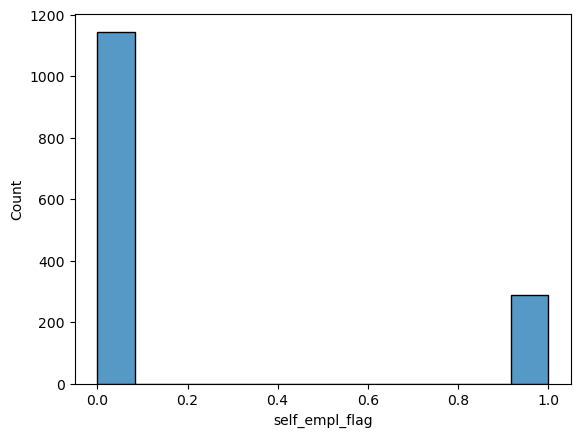

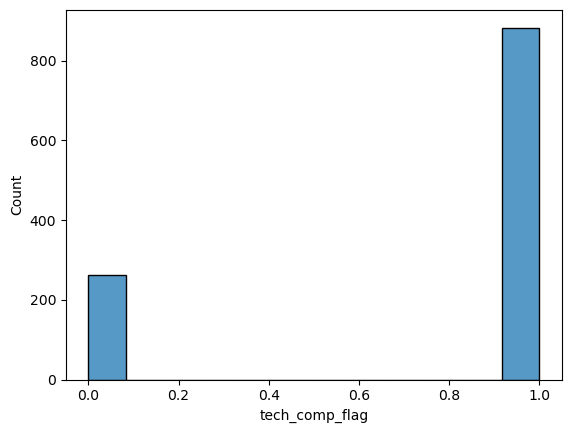

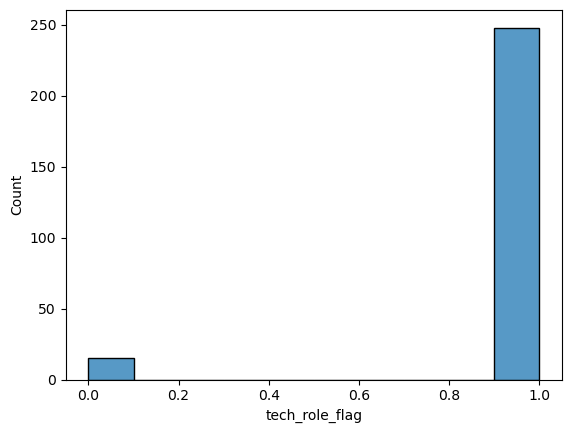

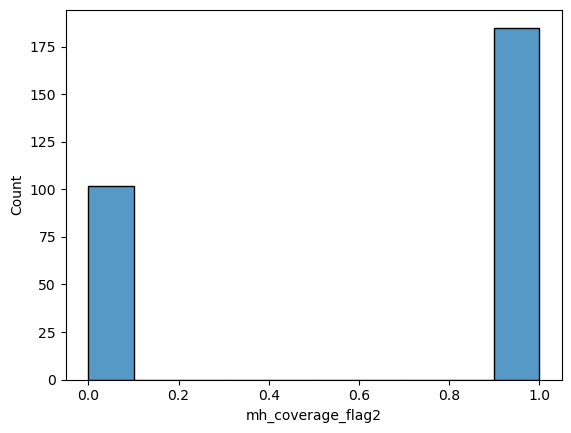

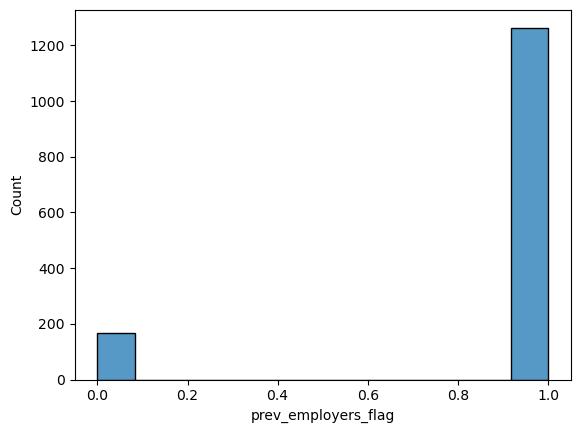

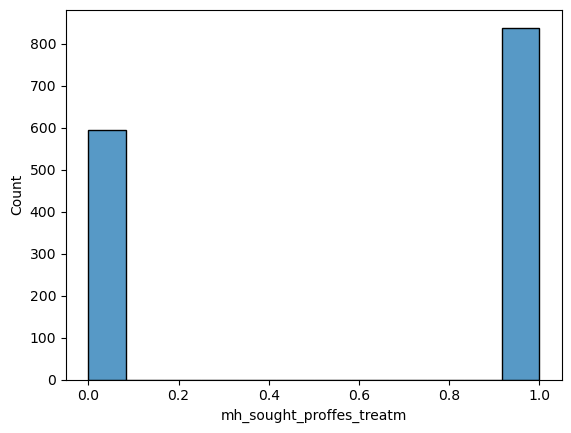

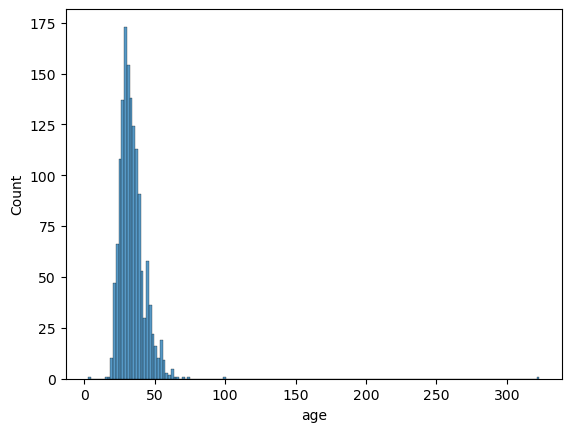

time: 4.12 s (started: 2025-08-24 16:26:57 +11:00)


In [166]:
#HISTOGRAM to understand the distribution of the numerical features
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

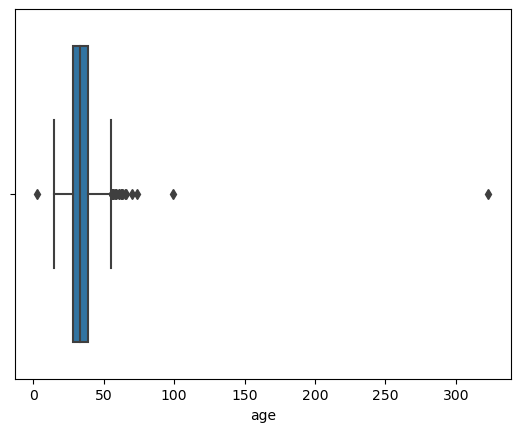

time: 203 ms (started: 2025-08-24 16:27:01 +11:00)


In [167]:
#BOXPLOT to identify outliers (for 'age" as other numerical columns are boolean and would be irrelevant with boxplots).
for i in df.select_dtypes(include="number")[['age']]:
    sns.boxplot(data=df,x=i)
    plt.show()

In [168]:
#CORRELATION with heatmap to interpret the relation and multicolliniarity (">0.5" =strong correlation & "<50"=weak correlation)
df.select_dtypes(include="number").corr()

self_empl_flag  tech_comp_flag  tech_role_flag  \
self_empl_flag                  1.000000             NaN             NaN   
tech_comp_flag                       NaN        1.000000             NaN   
tech_role_flag                       NaN             NaN        1.000000   
mh_coverage_flag2                    NaN             NaN             NaN   
prev_employers_flag            -0.022451        0.038714        0.045161   
mh_sought_proffes_treatm        0.049432       -0.000934        0.020298   
age                             0.111676       -0.079585       -0.053179   

                          mh_coverage_flag2  prev_employers_flag  \
self_empl_flag                          NaN            -0.022451   
tech_comp_flag                          NaN             0.038714   
tech_role_flag                          NaN             0.045161   
mh_coverage_flag2                  1.000000             0.053584   
prev_employers_flag                0.053584             1.000000   
mh_sought_proffes_treatm           0.085889             0.083214   
age                               -0.016832             0.113933   

                          mh_sought_proffes_treatm       age  
self_empl_flag                            0.049432  0.111676  
tech_comp_flag                           -0.000934 -0.079585  
tech_role_flag                            0.020298 -0.053179  
mh_coverage_flag2                         0.085889 -0.016832  
prev_employers_flag                       0.083214  0.113933  
mh_sought_proffes_treatm                  1.000000  0.031369  
age                                       0.031369  1.000000

time: 47 ms (started: 2025-08-24 16:27:01 +11:00)


<Axes: >

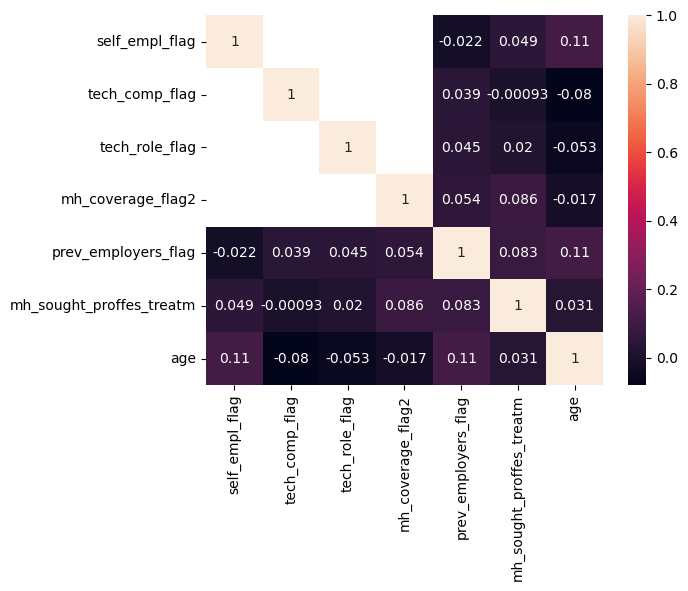

time: 641 ms (started: 2025-08-24 16:27:01 +11:00)


In [169]:
#HEATNAP (remove one column from pairs with correlation > 0.9)
s=df.select_dtypes(include="number").corr()
#plt.figure(figsize=(15,15)) - resizing method
sns.heatmap(s,annot=True)

## 5. <font color='blue'>Missing Value treatments<font>

In [170]:
#auto dropping columns with 50% or more of its values being null
threshold=0.5
df=df[df.columns[df.isnull().mean()<threshold]]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 50 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   self_empl_flag                   1433 non-null   int64  
 1   comp_no_empl                     1146 non-null   object 
 2   tech_comp_flag                   1146 non-null   float64
 3   mh_coverage_flag                 1146 non-null   object 
 4   mh_coverage_awareness_flag       1013 non-null   object 
 5   mh_employer_discussion           1146 non-null   object 
 6   mh_resources_provided            1146 non-null   object 
 7   mh_anonimity_flag                1146 non-null   object 
 8   mh_medical_leave                 1146 non-null   object 
 9   mh_discussion_neg_impact         1146 non-null   object 
 10  ph_discussion_neg_impact         1146 non-null   object 
 11  mh_discussion_cowork             1146 non-null   object 
 12  mh_discussion_superv

In [171]:
#Choosing the method of imputing missing values (mean, median, mode or KNNIputer)
#Which for which: Continous variable(mean/median), discrete variable(mode), categorical variable(mode)
pd.set_option('display.max_rows', None)
print(df.isnull().sum().sort_values(ascending=False))

live_us_teritory                   593
work_us_teritory                   582
mh_coverage_awareness_flag         420
why/why_not                        338
why/why_not2                       307
ph_discussion_neg_impact           287
mh_conseq_coworkers                287
mh_eq_ph_employer                  287
mh_discussion_supervis             287
comp_no_empl                       287
mh_discussion_cowork               287
mh_medical_leave                   287
mh_anonimity_flag                  287
mh_resources_provided              287
mh_employer_discussion             287
mh_coverage_flag                   287
tech_comp_flag                     287
mh_discussion_neg_impact           287
prev_mh_conseq_coworkers           169
prev_mh_importance_employer        169
prev_mh_discussion_cowork          169
prev_mh_discussion_supervisor      169
prev_mh_resources                  169
prev_ph_discuss_neg_conseq         169
prev_mh_discuss_neg_conseq         169
prev_mh_anonimity        

In [172]:
#IMPUTING 1 ("CATEGORICALl"): "comp_no_empl" values are read as strings so applying the median would produce "TypeError" despite actually being a continuous variable
for i in ["comp_no_empl"]:
    df[i].fillna(df[i].mode()[0],inplace=True)

time: 16 ms (started: 2025-08-24 16:27:02 +11:00)


In [173]:
#IMPUTING 1.1: checking if null were replaced with mode and SUCCESS!"
select_col=df["comp_no_empl"]
null_count=select_col.isnull().sum()
print(f"{null_count}")

0
time: 31 ms (started: 2025-08-24 16:27:02 +11:00)


In [174]:
#IMPUTING 2.1: Filling null values for numerical columns using mode as it is best imputer for binary columns (median/mean wouldnt work)
for i in df.select_dtypes(include="number").columns:
    if i != "age": #excludes column "age"
        df[i].fillna(df[i].mode()[0], inplace=True)

#IMPUTING 2.2: Checking if null values are imputed
s=df.select_dtypes(include="number").columns
pd.set_option("display.max_row", 10)
pd.set_option("display.max_column", None)
print(df[s])

      self_empl_flag  tech_comp_flag  prev_employers_flag  \
0                  0             1.0                    1   
1                  0             1.0                    1   
2                  0             1.0                    1   
3                  1             1.0                    1   
4                  0             0.0                    1   
...              ...             ...                  ...   
1428               1             1.0                    1   
1429               1             1.0                    0   
1430               0             1.0                    1   
1431               0             0.0                    1   
1432               0             1.0                    0   

      mh_sought_proffes_treatm  age  
0                            0   39  
1                            1   29  
2                            1   38  
3                            1   43  
4                            1   43  
...                        ...  ...  
1

In [175]:
#IMPUTING 3: Using K-Nearest neighbour to impute the null for the "age" numerical column 
from sklearn.impute import KNNImputer
impute=KNNImputer()

#IMPUTING 3.1:
for i in df.select_dtypes(include="number").columns:
    if i == "age": #includes ONLY column "age"
        df[i]=impute.fit_transform(df[[i]])
        
#IMPUTING 3.2: Checking if null values are imputed using KNN
s=df.select_dtypes(include="number").columns
pd.set_option("display.max_row", 10)
pd.set_option("display.max_column", None)
print(df[s])

      self_empl_flag  tech_comp_flag  prev_employers_flag  \
0                  0             1.0                    1   
1                  0             1.0                    1   
2                  0             1.0                    1   
3                  1             1.0                    1   
4                  0             0.0                    1   
...              ...             ...                  ...   
1428               1             1.0                    1   
1429               1             1.0                    0   
1430               0             1.0                    1   
1431               0             0.0                    1   
1432               0             1.0                    0   

      mh_sought_proffes_treatm   age  
0                            0  39.0  
1                            1  29.0  
2                            1  38.0  
3                            1  43.0  
4                            1  43.0  
...                        ...   

<font color='yellow'>Now for other categorical values</font>

In [176]:
from sklearn.impute import SimpleImputer

cat_cols = df.select_dtypes(include=['object']).columns
imp = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imp.fit_transform(df[cat_cols])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 50 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   self_empl_flag                   1433 non-null   int64  
 1   comp_no_empl                     1433 non-null   object 
 2   tech_comp_flag                   1433 non-null   float64
 3   mh_coverage_flag                 1433 non-null   object 
 4   mh_coverage_awareness_flag       1433 non-null   object 
 5   mh_employer_discussion           1433 non-null   object 
 6   mh_resources_provided            1433 non-null   object 
 7   mh_anonimity_flag                1433 non-null   object 
 8   mh_medical_leave                 1433 non-null   object 
 9   mh_discussion_neg_impact         1433 non-null   object 
 10  ph_discussion_neg_impact         1433 non-null   object 
 11  mh_discussion_cowork             1433 non-null   object 
 12  mh_discussion_superv

In [177]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.min_rows', 50)
pd.set_option('display.max_columns', None)
df

self_empl_flag    comp_no_empl  tech_comp_flag  \
0                  0          26-100             1.0   
1                  0            6-25             1.0   
2                  0            6-25             1.0   
3                  1          26-100             1.0   
4                  0            6-25             0.0   
5                  0  More than 1000             1.0   
6                  0          26-100             1.0   
7                  0  More than 1000             1.0   
8                  0          26-100             0.0   
9                  1          26-100             1.0   
10                 0          26-100             1.0   
11                 0         100-500             0.0   
12                 0         100-500             1.0   
13                 0         100-500             0.0   
14                 0         100-500             1.0   
15                 0         100-500             1.0   
16                 0          26-100             1.0   
17                 0        500-1000             1.0   
18                 1          26-100             1.0   
19                 0         100-500             0.0   
20                 0            6-25             1.0   
21                 0  More than 1000             0.0   
22                 0          26-100             1.0   
23                 0             1-5             1.0   
24                 1          26-100             1.0   
...              ...             ...             ...   
1408               1          26-100             1.0   
1409               0         100-500             1.0   
1410               0          26-100             1.0   
1411               0            6-25             1.0   
1412               0             1-5             1.0   
1413               0         100-500             0.0   
1414               0        500-1000             1.0   
1415               0  More than 1000             0.0   
1416               0        500-1000             1.0   
1417               0          26-100             1.0   
1418               0          26-100             1.0   
1419               0  More than 1000             1.0   
1420               1          26-100             1.0   
1421               0          26-100             1.0   
1422               0          26-100             1.0   
1423               0         100-500             1.0   
1424               0         100-500             1.0   
1425               0         100-500             1.0   
1426               0         100-500             1.0   
1427               0        500-1000             1.0   
1428               1          26-100             1.0   
1429               1          26-100             1.0   
1430               0         100-500             1.0   
1431               0         100-500             0.0   
1432               0         100-500             1.0   

                     mh_coverage_flag mh_coverage_awareness_flag  \
0     Not eligible for coverage / N/A                         No   
1                                  No                        Yes   
2                                  No                         No   
3                                 Yes                         No   
4                                 Yes                        Yes   
5                                 Yes              I am not sure   
6                        I don't know                         No   
7                                 Yes                        Yes   
8                        I don't know                         No   
9                                 Yes                         No   
10                                Yes              I am not sure   
11                                Yes                        Yes   
12                                Yes              I am not sure   
13                                Yes                        Yes   
14                                Yes                        Yes   
15   

time: 140 ms (started: 2025-08-24 16:27:03 +11:00)


## 6. <font color='blue'>Outliers treatment<font>

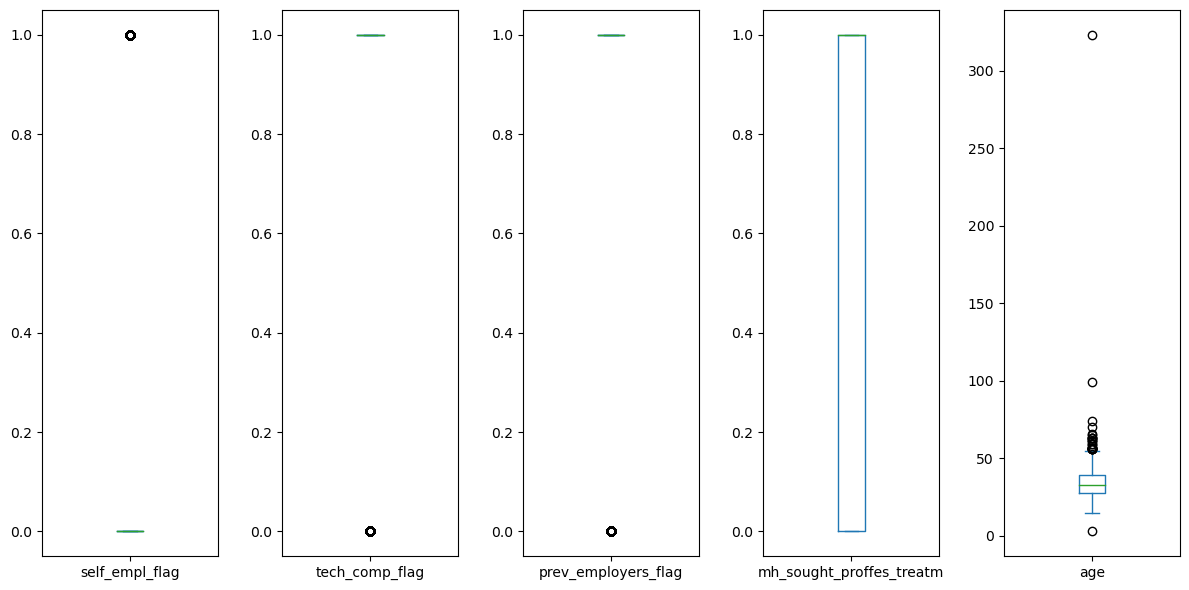

time: 875 ms (started: 2025-08-24 16:27:03 +11:00)


In [178]:
#an immediate view of outliers for the numerical columns (from 7 to 5 columns now)
#from: "import seaborn as sns" & "import matplotlib.pyplot as plt"

# Plot boxplots for all numeric columns
df.select_dtypes(include=['int64', 'float64']).plot(kind='box', subplots=True, figsize=(12, 6), layout=(1, 5), sharey=False)
plt.tight_layout()
plt.show()

In [179]:
#Define the outlier ages
outlier_ages = [3, 15, 99, 323]

#Calculate the median of ages excluding those outliers
median_age = df[~df['age'].isin(outlier_ages)]['age'].median()

#replace outlier ages with the median
df['age'] = df['age'].apply(lambda x: median_age if x in outlier_ages else x)


time: 16 ms (started: 2025-08-24 16:27:04 +11:00)


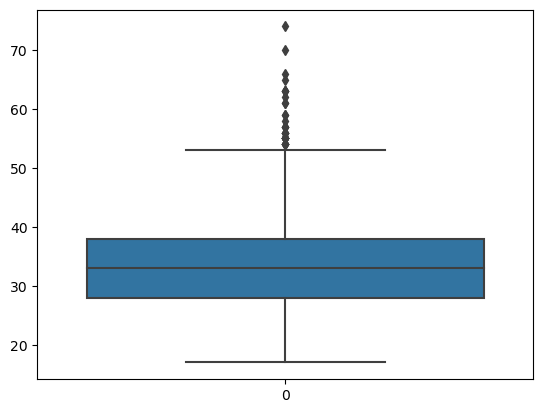

time: 188 ms (started: 2025-08-24 16:27:04 +11:00)


In [180]:
for i in ['age']:
    sns.boxplot(df[i])
    plt.show()

<font color='yellow'>Ages up to 70+ are plausible, especially if you're dealing with a general population dataset (Eg: Bill gates was 59 years old when he was still Microsoft's chairman of the board).<font>

## 7. <font color='blue'>Duplicates & garbage value treatments<font>

In [181]:
#check for complete row duplicates
duplicate_rows = df[df.duplicated()] #No orguments here so it checks entire rows - “Is there another row in the dataset that is an exact copy - across all columns?”
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0
time: 47 ms (started: 2025-08-24 16:27:04 +11:00)


**Dropping columns with custom responses**

Drop the columns with customized responses since analyzing them means manually reviewing each one, which can be tricky.

In [182]:
#Using same code as cell [48] below, the following 2 columns has over 1000 unique values:
df.drop(['why/why_not', 'why/why_not2'], axis=1, inplace=True)

time: 0 ns (started: 2025-08-24 16:27:04 +11:00)


<font color='yellow'>**No duplicate treatment required**<font>

## 8. <font color='blue'>Normalization<font>

<fonr color='yellow'>The gender column needs to be standardized, having 70 unique attributes.<font>
    


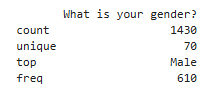


In [183]:
def clean_gender(gender):
    gender = str(gender).strip().lower()
    if gender in ['Male', 'male', 'Male ', 'M', 'm',
       'man', 'Cis male', 'Male.', 'male 9:1 female, roughly', 'Male (cis)', 'Man', 'Sex is male',
       'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'male ',
       'Cis Male', 'Male (trans, FtM)',
       'cisdude', 'cis man', 'MALE']:
        return 'Male'
    elif gender in ['Female', 'female', 'I identify as female.', 'female ',
       'Female assigned at birth ', 'F', 'Woman', 'fm', 'f', 'Cis female ', 'Transitioned, M2F',
       'Genderfluid (born female)', 'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman',
       'Cisgender Female', 'fem', 'Female (props for making this a freeform field, though)',
       ' Female', 'Cis-woman', 'female-bodied; no feelings about gender',
       'AFAB']:
        return 'Female'
    else:
        return 'Other'

df['sex'] = df['sex'].apply(clean_gender)

time: 16 ms (started: 2025-08-24 16:27:04 +11:00)


In [184]:
#renaming of each columns' value for ease of plotting/data visualisation
df['comp_no_empl'].replace(to_replace = ['More than 1000'], value = '>1000', inplace = True)
df['country_live'].replace(to_replace = ['United States of America'], value = 'USA', inplace = True)
df['country_live'].replace(to_replace = ['United Kingdom'], value = 'UK', inplace = True)
df['country_work'].replace(to_replace = ['United States of America'], value = 'USA', inplace = True)
df['country_work'].replace(to_replace = ['United Kingdom'], value = 'UK', inplace = True)

time: 16 ms (started: 2025-08-24 16:27:04 +11:00)


In [185]:
print(df['work_position'].value_counts()) #showing the many unique entires of work_position

Back-end Developer                                                                                                            263
Front-end Developer                                                                                                           125
Other                                                                                                                         112
Supervisor/Team Lead                                                                                                           68
Back-end Developer|Front-end Developer                                                                                         61
DevOps/SysAdmin                                                                                                                54
One-person shop                                                                                                                50
Executive Leadership                                                                      

In [186]:
#"work-position" has too many unique entries. need to set a threshold for low-frequency categories
threshold = 40  # Categories with less than 40 occurrences will be grouped

#counting the frequency of each category in the column
work_position_counts = df['work_position'].value_counts()

#Create a new column with grouped categories
df['work_position_grouped'] = df['work_position'].apply(
    lambda x: x if work_position_counts[x] >= threshold else 'Other'
)

#checking the new grouped column
#there's initially an "other" category in the origianl "work_position" column (check cell [161]) and I was thinking thered be 2 "others", but it looks they are combined
print(df['work_position_grouped'].value_counts())


Other                                     726
Back-end Developer                        263
Front-end Developer                       125
Supervisor/Team Lead                       68
Back-end Developer|Front-end Developer     61
DevOps/SysAdmin                            54
One-person shop                            50
Executive Leadership                       46
Front-end Developer|Back-end Developer     40
Name: work_position_grouped, dtype: int64
time: 47 ms (started: 2025-08-24 16:27:04 +11:00)


In [187]:
#Replace the original 'work_position' column with the grouped version
df['work_position'] = df['work_position_grouped']
df.drop(columns=['work_position_grouped'], inplace=True)

time: 47 ms (started: 2025-08-24 16:27:04 +11:00)


In [188]:
#Updating the identifying of categorical vs. numerical columns from cell [68] to include the new changes and so cells [184 - 185] would work
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("\nCategorical Columns:", categorical_cols.tolist())
print("Numerical Columns:", numerical_cols.tolist())


Categorical Columns: ['comp_no_empl', 'mh_coverage_flag', 'mh_coverage_awareness_flag', 'mh_employer_discussion', 'mh_resources_provided', 'mh_anonimity_flag', 'mh_medical_leave', 'mh_discussion_neg_impact', 'ph_discussion_neg_impact', 'mh_discussion_cowork', 'mh_discussion_supervis', 'mh_eq_ph_employer', 'mh_conseq_coworkers', 'prev_mh_benefits', 'prev_mh_benefits_awareness', 'prev_mh_discussion', 'prev_mh_resources', 'prev_mh_anonimity', 'prev_mh_discuss_neg_conseq', 'prev_ph_discuss_neg_conseq', 'prev_mh_discussion_cowork', 'prev_mh_discussion_supervisor', 'prev_mh_importance_employer', 'prev_mh_conseq_coworkers', 'future_ph_specification', 'future_mh_specification', 'mh_hurt_on_career', 'mh_neg_view_cowork', 'mh_sharing_friends/fam_flag', 'mh_bad_response_workplace', 'mh_family_hist', 'mh_disorder_past', 'mh_disorder_current', 'mh_diagnos_proffesional', 'mh_eff_treat_impact_on_work', 'mh_not_eff_treat_impact_on_work', 'sex', 'country_live', 'live_us_teritory', 'country_work', 'wor

In [189]:
print(df['work_position'].value_counts())

Other                                     726
Back-end Developer                        263
Front-end Developer                       125
Supervisor/Team Lead                       68
Back-end Developer|Front-end Developer     61
DevOps/SysAdmin                            54
One-person shop                            50
Executive Leadership                       46
Front-end Developer|Back-end Developer     40
Name: work_position, dtype: int64
time: 46 ms (started: 2025-08-24 16:27:05 +11:00)


### Feature engineering

In [190]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
df

self_empl_flag comp_no_empl  tech_comp_flag  \
0                  0       26-100             1.0   
1                  0         6-25             1.0   
2                  0         6-25             1.0   
3                  1       26-100             1.0   
4                  0         6-25             0.0   
...              ...          ...             ...   
1428               1       26-100             1.0   
1429               1       26-100             1.0   
1430               0      100-500             1.0   
1431               0      100-500             0.0   
1432               0      100-500             1.0   

                     mh_coverage_flag mh_coverage_awareness_flag  \
0     Not eligible for coverage / N/A                         No   
1                                  No                        Yes   
2                                  No                         No   
3                                 Yes                         No   
4                                 Yes                        Yes   
...                               ...                        ...   
1428                              Yes                         No   
1429                              Yes                         No   
1430                              Yes                        Yes   
1431                     I don't know              I am not sure   
1432                              Yes                         No   

     mh_employer_discussion mh_resources_provided mh_anonimity_flag  \
0                        No                    No      I don't know   
1                       Yes                   Yes               Yes   
2                        No                    No      I don't know   
3                        No                    No      I don't know   
4                        No                    No                No   
...                     ...                   ...               ...   
1428                     No                    No      I don't know   
1429                     No                    No      I don't know   
1430                    Yes                   Yes      I don't know   
1431                     No                   Yes      I don't know   
1432                     No                    No      I don't know   

                mh_medical_leave mh_discussion_neg_impact  \
0                      Very easy                       No   
1                  Somewhat easy                       No   
2     Neither easy nor difficult                    Maybe   
3                  Somewhat easy                    Maybe   
4     Neither easy nor difficult                      Yes   
...                          ...                      ...   
1428               Somewhat easy                    Maybe   
1429               Somewhat easy                    Maybe   
1430          Somewhat difficult                    Maybe   
1431          Somewhat difficult                    Maybe   
1432              Very difficult                    Maybe   

     ph_discussion_neg_impact mh_discussion_cowork mh_discussion_supervis  \
0                          No                Maybe                    Yes   
1                          No                Maybe                    Yes   
2                          No                Maybe                  Maybe   
3                          No                Maybe                    Yes   
4                       Maybe                Maybe                     No   
...                       ...                  ...                    ...   
1428                       No                Maybe                    Yes   
1429                       No                Maybe                    Yes   
1430                    Maybe                  Yes                    Yes   
1431                       No                Maybe                    Yes   
1432                       No                Maybe                  Maybe   

     mh_eq_ph_employer mh_conseq_coworker

time: 125 ms (started: 2025-08-24 16:27:05 +11:00)


## 9. <font color='blue'>Encoding of data<font>

In [191]:
#From "pandas" 
dummy = pd.get_dummies(data=df,columns=categorical_cols,drop_first=True)

time: 140 ms (started: 2025-08-24 16:27:05 +11:00)


In [192]:
dummy

self_empl_flag  tech_comp_flag  prev_employers_flag  \
0                  0             1.0                    1   
1                  0             1.0                    1   
2                  0             1.0                    1   
3                  1             1.0                    1   
4                  0             0.0                    1   
...              ...             ...                  ...   
1428               1             1.0                    1   
1429               1             1.0                    0   
1430               0             1.0                    1   
1431               0             0.0                    1   
1432               0             1.0                    0   

      mh_sought_proffes_treatm   age  comp_no_empl_100-500  \
0                            0  39.0                     0   
1                            1  29.0                     0   
2                            1  38.0                     0   
3                            1  43.0                     0   
4                            1  43.0                     0   
...                        ...   ...                   ...   
1428                         1  34.0                     0   
1429                         0  56.0                     0   
1430                         1  52.0                     1   
1431                         0  30.0                     1   
1432                         0  25.0                     1   

      comp_no_empl_26-100  comp_no_empl_500-1000  comp_no_empl_6-25  \
0                       1                      0                  0   
1                       0                      0                  1   
2                       0                      0                  1   
3                       1                      0                  0   
4                       0                      0                  1   
...                   ...                    ...                ...   
1428                    1                      0                  0   
1429                    1                      0                  0   
1430                    0                      0                  0   
1431                    0                      0                  0   
1432                    0                      0                  0   

      comp_no_empl_>1000  mh_coverage_flag_No  \
0                      0                    0   
1                      0                    1   
2                      0                    1   
3                      0                    0   
4                      0                    0   
...                  ...                  ...   
1428                   0                    0   
1429                   0                    0   
1430                   0                    0   
1431                   0                    0   
1432                   0                    0   

      mh_coverage_flag_Not eligible for coverage / N/A  mh_coverage_flag_Yes  \
0                                                    1                     0   
1                                                    0                     0   
2                                                    0                     0   
3                                                    0                     1   
4                                                    0                     1   
...                                                ...                   ...   
1428                                                 0                     1   
1429                                                 0                     1   
1430                                                 0                     1   
1431                                                 0                     0   
1432                                                 0                     1   

      mh_coverage_awareness_flag_No  mh_coverage_awareness_flag_Yes  \
0                                 1                   

time: 250 ms (started: 2025-08-24 16:27:05 +11:00)


In [193]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Columns: 310 entries, self_empl_flag to remote_flag_Sometimes
dtypes: float64(2), int64(3), uint8(305)
memory usage: 482.9 KB
time: 250 ms (started: 2025-08-24 16:27:05 +11:00)


## 10. <font color='blue'>Scaling</font> 

scaling specifically for the age column as its values can be weighted in distance

In [194]:
from sklearn.preprocessing import StandardScaler

#nitializing the scaler
scaler = StandardScaler()

#only scaling the age column and replacing it in the DataFrame
dummy['age'] = scaler.fit_transform(dummy[['age']])

time: 47 ms (started: 2025-08-24 16:27:06 +11:00)


In [195]:
dummy.head()

self_empl_flag  tech_comp_flag  prev_employers_flag  \
0               0             1.0                    1   
1               0             1.0                    1   
2               0             1.0                    1   
3               1             1.0                    1   
4               0             0.0                    1   

   mh_sought_proffes_treatm       age  comp_no_empl_100-500  \
0                         0  0.609842                     0   
1                         1 -0.627456                     0   
2                         1  0.486112                     0   
3                         1  1.104761                     0   
4                         1  1.104761                     0   

   comp_no_empl_26-100  comp_no_empl_500-1000  comp_no_empl_6-25  \
0                    1                      0                  0   
1                    0                      0                  1   
2                    0                      0                  1   
3                    1                      0                  0   
4                    0                      0                  1   

   comp_no_empl_>1000  mh_coverage_flag_No  \
0                   0                    0   
1                   0                    1   
2                   0                    1   
3                   0                    0   
4                   0                    0   

   mh_coverage_flag_Not eligible for coverage / N/A  mh_coverage_flag_Yes  \
0                                                 1                     0   
1                                                 0                     0   
2                                                 0                     0   
3                                                 0                     1   
4                                                 0                     1   

   mh_coverage_awareness_flag_No  mh_coverage_awareness_flag_Yes  \
0                              1                               0   
1                              0                               1   
2                              1                               0   
3                              1                               0   
4                              0                               1   

   mh_employer_discussion_No  mh_employer_discussion_Yes  \
0                          1                           0   
1                          0                           1   
2                          1                           0   
3                          1                           0   
4                          1                           0   

   mh_resources_provided_No  mh_resources_provided_Yes  mh_anonimity_flag_No  \
0                         1                          0                     0   
1                         0                          1                     0   
2                         1                          0                     0   
3                         1                          0                     0   
4                         1                          0                     1   

   mh_anonimity_flag_Yes  mh_medical_leave_Neither easy nor difficult  \
0                      0                                            0   
1                      1                                            0   
2                      0                                            1   
3                      0                                            0   
4                      0                                            1   

   mh_medical_leave_Somewhat difficult  mh_medical_leave_Somewhat easy  \
0                                    0                               0   
1                                    0                               1   
2                                    0                               0   
3                                    0                               1   
4                                    0                            

time: 219 ms (started: 2025-08-24 16:27:06 +11:00)


# II. <font color='red'>Dimensionality Reduction (PCA)<font>
    
SOurced from [here](https://www.geeksforgeeks.org/machine-learning/implementing-pca-in-python-with-scikit-learn/)

In [196]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

time: 62 ms (started: 2025-08-24 16:27:06 +11:00)


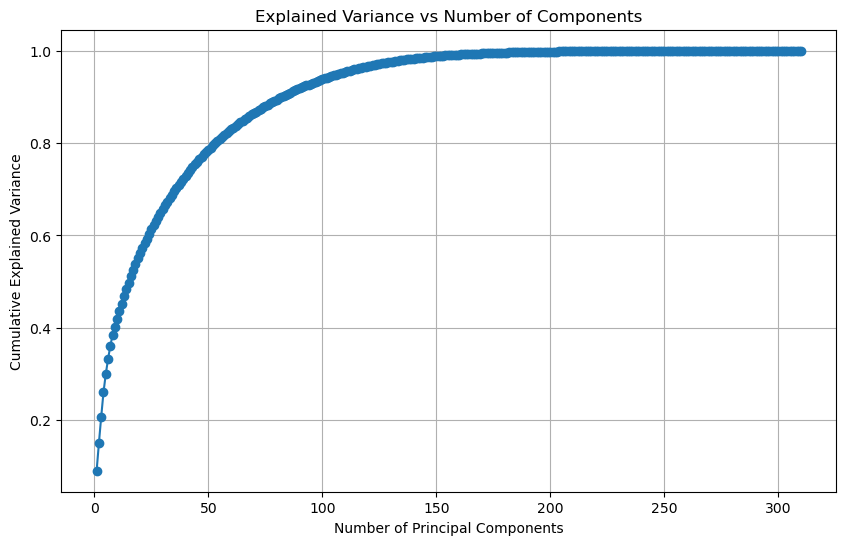

Reduced data shape: (1433, 108)
time: 1.34 s (started: 2025-08-24 16:27:06 +11:00)


In [197]:
#1.applying PCA.
pca = PCA()
X_pca = pca.fit_transform(dummy)

#2. creating a  sree plot for the explaine variance
plt.figure(figsize=(10,6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.show()

#3. deciding on the number of components, eg, to keep 95% variance.
pca_n = PCA(n_components=0.95)
X_pca_reduced = pca_n.fit_transform(dummy)

print(f"Reduced data shape: {X_pca_reduced.shape}")

- To retain 95% of the variance.
- Looking at the plot, the curve crosses 95% variance at around 108 components.
- That matches the output:
<font color='yellow'>**Reduced data shape: (1433, 108)**<font>

SUCCESSFULLY: reduced 310 encoded features to 108 principal components that capture 95% of the total variance. 
    
Next to create a t-SNE plot before K-means to draw a comparision.

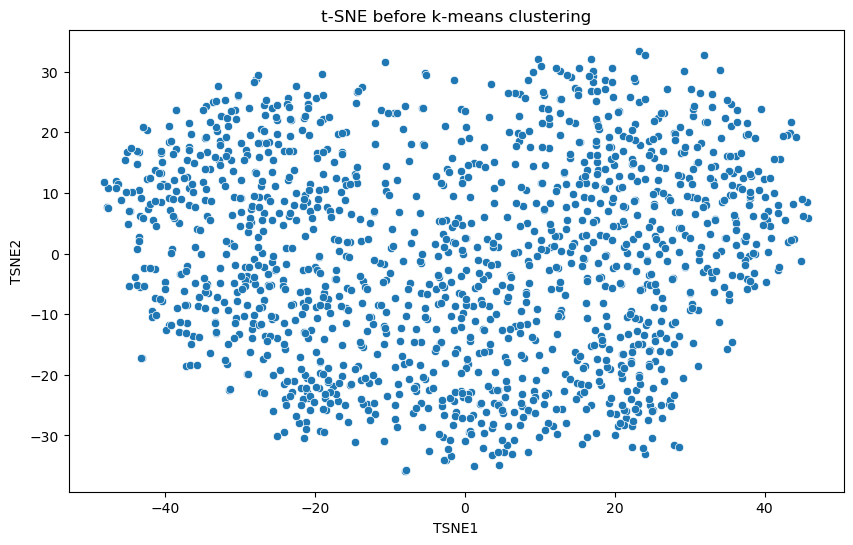

time: 12.5 s (started: 2025-08-24 16:27:08 +11:00)


In [198]:
#performing t-SNE BEFORE clustering to draw comparision
tsne_pre = TSNE(n_components=2, random_state=47)  #adjusteing perplexity to 47 after some trials for better spread
tsne_pre_result = tsne_pre.fit_transform(X_pca_reduced)  # using raw cleaned dataset (before PCA)

#converting to DataFrame for plotting
tsne_pre_df = pd.DataFrame(tsne_pre_result, columns=['TSNE1', 'TSNE2'])

#visualizing the dataset spread before clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_pre_df, x='TSNE1', y='TSNE2')
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.title("t-SNE before k-means clustering")
plt.show()

# III. <font color='red'>K-means Clustering<font>

Overview:
- Choosing an appropriate number of clusters K.
- Fit the KMeans model.
- Assigning each record to a cluster.
- Add the cluster labels back to the dataset.

## 1. <font color='blue'>Determine number of K cluster using Elbow Method</font>

- sourced from: [here](https://www.statology.org/k-means-clustering-in-python/)

In [199]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

time: 16 ms (started: 2025-08-24 16:27:20 +11:00)


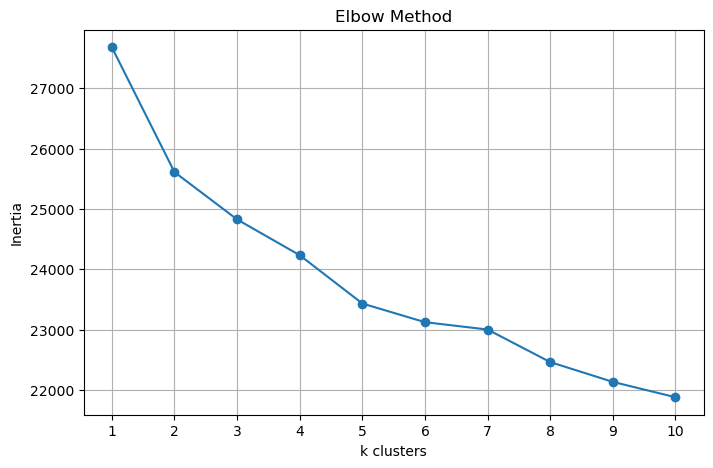

time: 1.14 s (started: 2025-08-24 16:27:20 +11:00)


In [200]:
#elbow methodcalculating the inertia for k = 1 to 10
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca_reduced)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('k clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

## 2. <font color='blue'>Apply K-Means Clustering</font>

Aside from kmeans, we're also adding cluster labels to the original dataframe ('dummy').
- this is because printing the cluster profile of just 'cluster_labels' would give rows with numbers/ PC numbers instead of original names like 'slf_emply'
- this is because 'cluster_labels' contain 'X_pca_reduced' which is a Numpy array 
- taken from: [here](https://stackoverflow.com/questions/72999895/how-to-label-cluster-after-applying-to-k-mean-clustering-to-dataset) and [here](https://medium.com/analytics-vidhya/clustering-and-profiling-customers-using-k-means-9afa4277427)(best)

In [201]:
km = KMeans(n_clusters=5, random_state=42) #initializing the KMeans with k=5
cluster_labels = km.fit_predict(X_pca_reduced) #X_pca_reduced df from after PCA.
dummy['Cluster'] = cluster_labels #adding cluster labels to the original one-hot encoded dataframe before applying PCA('dummy') 

time: 235 ms (started: 2025-08-24 16:27:21 +11:00)


In [202]:
print(dummy['Cluster'].value_counts())

4    403
3    275
2    273
1    252
0    230
Name: Cluster, dtype: int64
time: 16 ms (started: 2025-08-24 16:27:22 +11:00)


clustering results:
- Cluster 4 is the largest (403 points), and
- Cluster 0 is the smallest (230 points),

The distribution is not too imbalanced - good for interpretation.

# IV. <font color='red'>Data Visualisation & Analysis</font>

- What do the clusters represent?
- Are they separated clearly in lower dimensions?
- What features distinguish one cluster from another?

In [203]:
#Libraries
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

time: 31 ms (started: 2025-08-24 16:27:22 +11:00)


## 1. <font color='blue'>Visual evaluation (t-SNE plot)</font>

Visualizing the 5 clusters using t-SNE, and it shows a high degree of overlap, with clusters scattered and not forming clearly separated blobs.

This doesn’t necessarily mean KMeans failed - it but more so reflects that in high-dimensional spaces (there was alot of encoded features used), t-SNE reduces complexity but may distort distances.

observations:

- Some tight groups exist (bottom-left, upper clusters), meaning certain clusters are more distinct.
- However, the wide scatter and overlaps suggest there’s still ambiguity in how well KMeans separated the clusters - typical for real-world survey data.

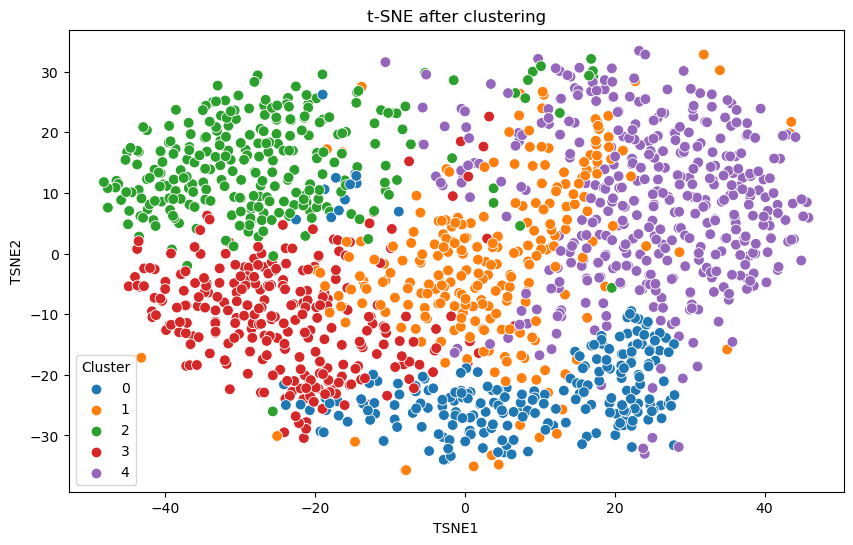

time: 12.1 s (started: 2025-08-24 16:27:22 +11:00)


In [204]:
#modified from geekforgeeks.com and w3school.com webpages
#perforimg t-SNE with 2 components. 
tsne = TSNE(n_components=2, random_state=47) #the following are also good random_state:7/9/10/18 
tsne_result = tsne.fit_transform(X_pca_reduced)#using the pca-reduced data.

#add to dataframe for plotting
tsne_df = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster'] = dummy['Cluster']

#for plotting.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Cluster', palette='tab10', s=60)
plt.title("t-SNE after clustering")
plt.legend(title='Cluster')
plt.show()

## 2. <font color='blue'>Cluster profiling</font>
### 2.1. Formatting the cluster centroid DataFrame into a more readable outpuy.

some source: [here](https://www.geeksforgeeks.org/k-means-clustering-with-scipy/)

The table below shows the cluster centroids (mean values per feature per cluster):

- Selecting features with values >/= 0.5 (the dominant traits).
- and then formatting them into a more readable output.

from [here](https://medium.com/analytics-vidhya/clustering-and-profiling-customers-using-k-means-9afa4277427)

In [205]:
#1. Computeing cluster-wise means (centroids) after joining cluster labels
cluster_profile = dummy.groupby('Cluster').mean()

#2.Compute overall dataset profile (excluding the 'Cluster' column)
overall_profile = dummy.drop(columns='Cluster').mean().to_frame(name='Overall Dataset')

#3. Combininning cluster-wise and overall profiles into a single DataFrame
df_profile = cluster_profile.T.join(overall_profile)


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
display(df_profile)

0         1  \
self_empl_flag                                      0.956522  0.000000   
tech_comp_flag                                      0.986957  0.722222   
prev_employers_flag                                 0.865217  0.884921   
mh_sought_proffes_treatm                            0.800000  0.797619   
age                                                 0.488802 -0.142357   
comp_no_empl_100-500                                0.004348  0.194444   
comp_no_empl_26-100                                 0.986957  0.246032   
comp_no_empl_500-1000                               0.000000  0.043651   
comp_no_empl_6-25                                   0.000000  0.190476   
comp_no_empl_>1000                                  0.004348  0.246032   
mh_coverage_flag_No                                 0.004348  0.353175   
mh_coverage_flag_Not eligible for coverage / N/A    0.000000  0.150794   
mh_coverage_flag_Yes                                0.986957  0.230159   
mh_coverage_awareness_flag_No                       0.986957  0.595238   
mh_coverage_awareness_flag_Yes                      0.008696  0.150794   
mh_employer_discussion_No                           0.991304  0.829365   
mh_employer_discussion_Yes                          0.008696  0.126984   
mh_resources_provided_No                            0.991304  0.674603   
mh_resources_provided_Yes                           0.004348  0.130952   
mh_anonimity_flag_No                                0.008696  0.154762   
mh_anonimity_flag_Yes                               0.017391  0.119048   
mh_medical_leave_Neither easy nor difficult         0.004348  0.150794   
mh_medical_leave_Somewhat difficult                 0.008696  0.253968   
mh_medical_leave_Somewhat easy                      0.982609  0.146825   
mh_medical_leave_Very difficult                     0.004348  0.250000   
...                                                      ...       ...   
work_us_teritory_Ohio                               0.017391  0.011905   
work_us_teritory_Oklahoma                           0.000000  0.000000   
work_us_teritory_Oregon                             0.039130  0.011905   
work_us_teritory_Pennsylvania                       0.013043  0.015873   
work_us_teritory_Rhode Island                       0.000000  0.000000   
work_us_teritory_South Carolina                     0.000000  0.000000   
work_us_teritory_South Dakota                       0.004348  0.000000   
work_us_teritory_Tennessee                          0.000000  0.007937   
work_us_teritory_Texas                              0.021739  0.019841   
work_us_teritory_Utah                               0.004348  0.003968   
work_us_teritory_Vermont                            0.008696  0.000000   
work_us_teritory_Virginia                           0.000000  0.003968   
work_us_teritory_Washington                         0.039130  0.007937   
work_us_teritory_West Virginia                      0.000000  0.000000   
work_us_teritory_Wisconsin                          0.017391  0.000000   
work_position_Back-end Developer|Front-end Deve...  0.004348  0.055556   
work_position_DevOps/SysAdmin                       0.021739  0.063492   
work_position_Executive Leadership                  0.052174  0.023810   
work_position_Front-end Developer                   0.034783  0.130952   
work_position_Front-end Developer|Back-end Deve...  0.021739  0.043651   
work_position_One-person shop                       0.165217  0.003968   
work_position_Other                                 0.595652  0.428571   
work_position_Supervisor/Team Lead                  0.017391  0.043651   
remote_flag_Never                                   0.078261  0.404762   
remote_flag_Sometimes                               0.469565  0.464286   

                                                           2         3  \
self_empl_flag                                      0.073260  0.170909   
tech_comp_flag                                      0.765568  

time: 109 ms (started: 2025-08-24 16:27:34 +11:00)


In [206]:
# 4. extracting features with values >= 0.5 as dominant traitss
top_feat = {
    C: cluster_profile.loc[C][cluster_profile.loc[C] >= 0.5].index.tolist()
    for C in cluster_profile.index
}

#5. Printing or formatting it to a readable for dominant traits per cluster
for C, features in top_feat.items():
    readable_features = [
        feat.replace('work position grouped', 'grouped position')
            .replace('work position', 'position')
            .replace('remote flag', 'remote work')
            .replace('country', 'Country')
            .replace('work us territory', 'US state')
        for feat in features
    ]
    print(f"Cluster {C}:")
    print(" - Dominant traits:")
    for feat in readable_features:
        print(f"   • {feat}")
    print()

Cluster 0:
 - Dominant traits:
   • self_empl_flag
   • tech_comp_flag
   • prev_employers_flag
   • mh_sought_proffes_treatm
   • comp_no_empl_26-100
   • mh_coverage_flag_Yes
   • mh_coverage_awareness_flag_No
   • mh_employer_discussion_No
   • mh_resources_provided_No
   • mh_medical_leave_Somewhat easy
   • ph_discussion_neg_impact_No
   • mh_discussion_supervis_Yes
   • prev_mh_benefits_awareness_N/A (not currently aware)
   • prev_mh_discussion_None did
   • prev_mh_discuss_neg_conseq_Some of them
   • prev_ph_discuss_neg_conseq_Some of them
   • prev_mh_discussion_cowork_Some of my previous employers
   • prev_mh_discussion_supervisor_Some of my previous employers
   • prev_mh_importance_employer_None did
   • future_mh_specification_No
   • mh_family_hist_Yes
   • mh_disorder_past_Yes
   • mh_disorder_current_Yes
   • mh_diagnos_proffesional_Yes
   • mh_not_eff_treat_impact_on_work_Often
   • sex_Male
   • Country_live_USA
   • live_us_teritory_California
   • Country_work_USA

## 3. <font color='blue'>Heatmap automatically generate from centroids</font> 

To automate this using the KMeans centroids, need:

- The cluster centers (centroids).
- A mapping of feature names after encoding.
- Logic to define "dominant" (e.g., top-N highest features per cluster).

modified and integrated from: [here](https://nbisweden.github.io/workshop-plotting-in-r/2109/lab_pca_hmap.html) & [here](https://github.com/AbbasPak/Pattern-recognition-by-using-principal-component-analysis-PCA-) & [here](https://biit.cs.ut.ee/clustvis/)

Best Sources: [GeekforGeeks](https://www.geeksforgeeks.org/kmeans-clustering-and-pca-on-wine-dataset/?utm_source=chatgpt.com) & [Ernesto Lee](https://drlee.io/the-ultimate-step-by-step-guide-to-data-mining-with-pca-and-kmeans-83a2bcfdba7d)

outline source here: [medium](https://medium.com/tomtalkspython/building-heatmaps-with-seaborn-a-step-by-step-guide-45c5bfcfaa7e)

### 3.1. Getting feature names and centroids

In [207]:
feature_names = [f"PC{i+1}" for i in range(X_pca_reduced.shape[1])] 
reduced_data_df = pd.DataFrame(X_pca_reduced, columns=feature_names)
print(reduced_data_df.columns)

centroids = km.cluster_centers_
feature_names = reduced_data_df.columns 

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       ...
       'PC99', 'PC100', 'PC101', 'PC102', 'PC103', 'PC104', 'PC105', 'PC106',
       'PC107', 'PC108'],
      dtype='object', length=108)
time: 16 ms (started: 2025-08-24 16:27:34 +11:00)


### 3.2. Extracting top-n features per cluster

Let’s say "dominant traits" variable is the top 10 features with the highest centroid values for each cluster

In [208]:
centroid_df = pd.DataFrame(centroids, columns=feature_names)

#getting top 3 PCs for each cluster
top_n = 3 
dominant_traits = {}

for i in range(centroid_df.shape[0]): 
    top_features = centroid_df.iloc[i].nlargest(top_n).index.tolist()
    dominant_traits[f"Cluster {i}"] = top_features

time: 109 ms (started: 2025-08-24 16:27:34 +11:00)


### 3.3. Creating binary matrix & visualize
Creating a binary matrix and drawing a heatmap:

from [matplotlib](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html) and [seaborn](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

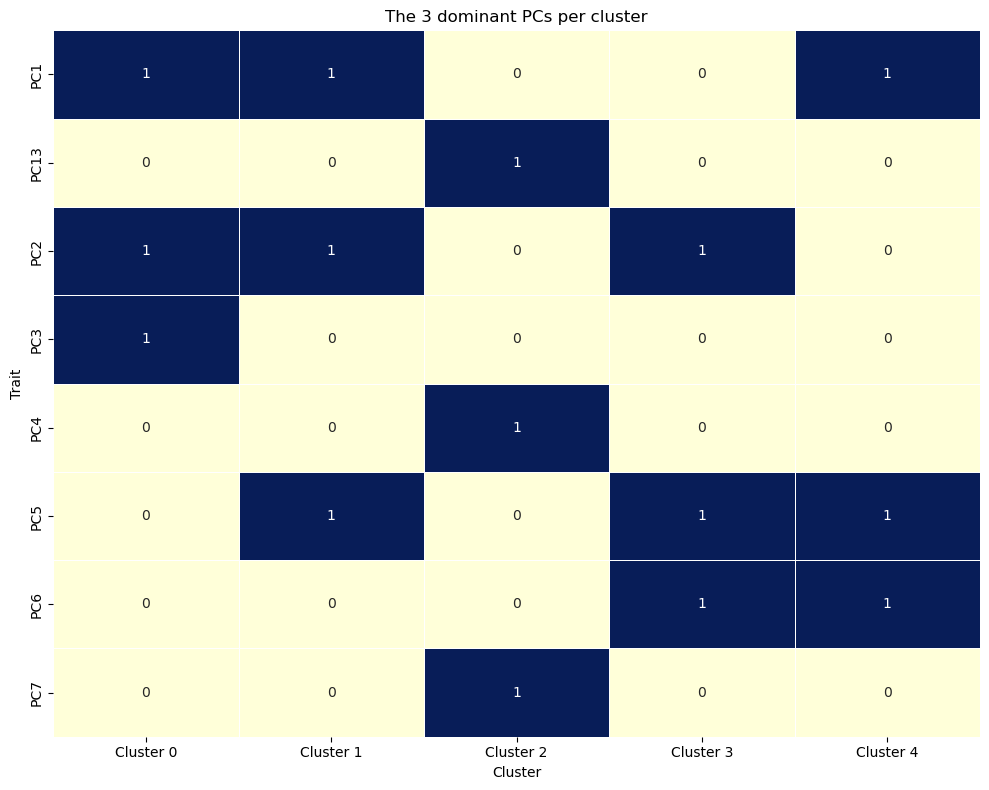

time: 390 ms (started: 2025-08-24 16:27:34 +11:00)


In [209]:
all_traits = sorted(set(sum(dominant_traits.values(), [])))
binary_matrix = pd.DataFrame(0, index=all_traits, columns=[f"Cluster {i}" for i in range(len(centroids))])

for cluster, traits in dominant_traits.items():
    for trait in traits:
        binary_matrix.loc[trait, cluster] = 1

plt.figure(figsize=(10, 8))
sns.heatmap(binary_matrix, cmap="YlGnBu", linewidths=0.5, annot=True, cbar=False)
plt.title("The 3 dominant PCs per cluster")
plt.xlabel("Cluster")
plt.ylabel("Trait")
plt.tight_layout()
plt.show()

## 4. <font color='blue'>Unscaling age</font>

<font color='yellow'>

- Evidently, the PC loadings dont tell us what 'age' exactly for each feature but rather how much the 'age' feature contributes to the respective PC
- Therefore, the followig code is created to output the following table
- This is to confirm whether the cluster skews older or younger, so to confirm which clusters has an older or younger population
    
(the source: [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html))
    
</font>

In [210]:
#the following table is created to be able to identify how old the "age" feature is for each of the PCs. 
dummy['cluster'] = cluster_labels
dummy.groupby('cluster')['age'].describe()

count      mean       std       min       25%       50%       75%  \
cluster                                                                      
0        230.0  0.488802  1.242928 -1.864753 -0.503726  0.238653  1.228491   
1        252.0 -0.142357  0.968926 -1.741024 -0.874915 -0.256267  0.362382   
2        273.0 -0.024217  0.947295 -1.864753 -0.751186 -0.132537  0.486112   
3        275.0 -0.250867  0.802051 -2.112213 -0.813050 -0.379996  0.362382   
4        403.0 -0.002360  0.927345 -1.741024 -0.627456 -0.132537  0.547977   

              max  
cluster            
0        4.940383  
1        3.950545  
2        3.331897  
3        2.589518  
4        3.579356

time: 78 ms (started: 2025-08-24 16:27:35 +11:00)


<font color='yellow'>
    
- But we still dont know what actual 'age' values the table represent, only the spread of it. 

- This is when we output the statistic for age right before scaling, so we can use the modified Z-score to calculate the actual age
</font>

In [211]:
#the mean and std of 'age' before being scaled but after cleanising dataframe: 'df'
df['age'].describe()

count    1433.000000
mean       34.071179
std         8.084951
min        17.000000
25%        28.000000
50%        33.000000
75%        38.000000
max        74.000000
Name: age, dtype: float64

time: 15 ms (started: 2025-08-24 16:27:35 +11:00)


<font color='yellow'>
-can "unscale" the entire age column statistics by applying the inverse transformation using the original mean and standard deviation (34 and 8 respectively).

-And now the numbers can be readable
</font>

In [212]:
#0original mean and std before scaling using the inverse of the Z-score. from geeeksforgeeks.com
og_mean = 34
og_std = 8

scaled_age = dummy.groupby('cluster')['age'].describe()

unscaled_age = scaled_age.copy()
for i in ['mean', 'min', '25%', '50%', '75%', 'max']:
    unscaled_age[i] = (scaled_age[i] * og_std) + og_mean

unscaled_age['std'] = scaled_age['std'] * og_std #standard deviation uses a different method

print(unscaled_age)

         count       mean       std        min        25%        50%  \
cluster                                                                
0        230.0  37.910415  9.943424  19.081973  29.970192  35.909220   
1        252.0  32.861147  7.751409  20.071811  27.000677  31.949868   
2        273.0  33.806267  7.578359  19.081973  27.990515  32.939706   
3        275.0  31.993061  6.416410  17.102296  27.495596  30.960030   
4        403.0  33.981124  7.418762  20.071811  28.980354  32.939706   

               75%        max  
cluster                        
0        43.827925  73.523068  
1        36.899058  65.604363  
2        37.888896  60.655172  
3        36.899058  54.716144  
4        38.383815  62.634849  
time: 78 ms (started: 2025-08-24 16:27:35 +11:00)


In [213]:
#dfdummy = pd.concat([df[['age']], dummy[['age']]], axis=1)

dummy2 = dummy
dummy2['age'] = df['age']

time: 47 ms (started: 2025-08-24 16:27:35 +11:00)


## 5. <font color='blue'>Interpret wehat a PC means from the heatmap with PC loadings and Combo charts</font>
Interpreting what each PC (eg: PC14 or PC3) is actually describing.

modfied source: [here](https://www.geeksforgeeks.org/feature-importance-in-pca-analyzing-loadings-and-biplots/?utm_source=chatgpt.com) (no biplot use) & [JC Chouinard](https://www.jcchouinard.com/pca-loadings/?utm_source=chatgpt.com)

Here we're also going to generate combo charts for cluster distribution with average feature values to help support thwe cluster profiling:
from: [here](https://www.youtube.com/watch?v=afPJeQuVeuY&t=6282s)

In [214]:
#1. Look at the PCA loadings:
loadings = pd.DataFrame(
    pca_n.components_.T, #'pca_n' is the the dataframe right after applying PCA (before X_pca_reduced)
    index=dummy.columns[:pca_n.components_.shape[1]], # using the df 'dummy' and only the first N columns
    columns=[f'PC{i+1}' for i in range(pca_n.n_components_)]
)

#2. Find top contributing features to each PC. We can use the binary matrix above:
top_features_pc = loadings['PC50'].abs().sort_values(ascending=False).head(2)
print(top_features_pc)

#3. This will tell which original features (e.g., "mh_sought_treatment", "remote_work_Yes", etc.) contribute the most to that PC.

mh_discussion_supervis_Yes    0.279166
mh_discussion_cowork_No       0.249244
Name: PC50, dtype: float64
time: 78 ms (started: 2025-08-24 16:27:35 +11:00)


<font color = 'yellow'> Cluster 0 <font>

In [215]:
#FOR CLUSTER 0
top1_features_pc = loadings['PC1'].abs().sort_values(ascending=False).head(5)
print("1st---")
print(top1_features_pc)

top2_features_pc = loadings['PC2'].abs().sort_values(ascending=False).head(5)
print("2nd---")
print(top2_features_pc)

top2_features_pc = loadings['PC3'].abs().sort_values(ascending=False).head(5)
print("3rd----")
print(top2_features_pc)

1st---
mh_diagnos_proffesional_Yes                             0.282426
mh_disorder_past_Yes                                    0.274402
mh_sought_proffes_treatm                                0.272608
mh_eff_treat_impact_on_work_Not applicable to me        0.272392
mh_not_eff_treat_impact_on_work_Not applicable to me    0.262361
Name: PC1, dtype: float64
2nd---
live_us_teritory_California    0.253946
country_live_USA               0.252159
work_us_teritory_California    0.251543
country_work_USA               0.249462
mh_resources_provided_No       0.231100
Name: PC2, dtype: float64
3rd----
age                               0.573054
mh_discussion_supervis_Yes        0.295738
mh_medical_leave_Somewhat easy    0.258015
self_empl_flag                    0.251969
comp_no_empl_26-100               0.228395
Name: PC3, dtype: float64
time: 63 ms (started: 2025-08-24 16:27:35 +11:00)


In [216]:
#from libraries:
#import matplotlib.pyplot as plt
#import seaborn as sns

time: 31 ms (started: 2025-08-24 16:27:35 +11:00)


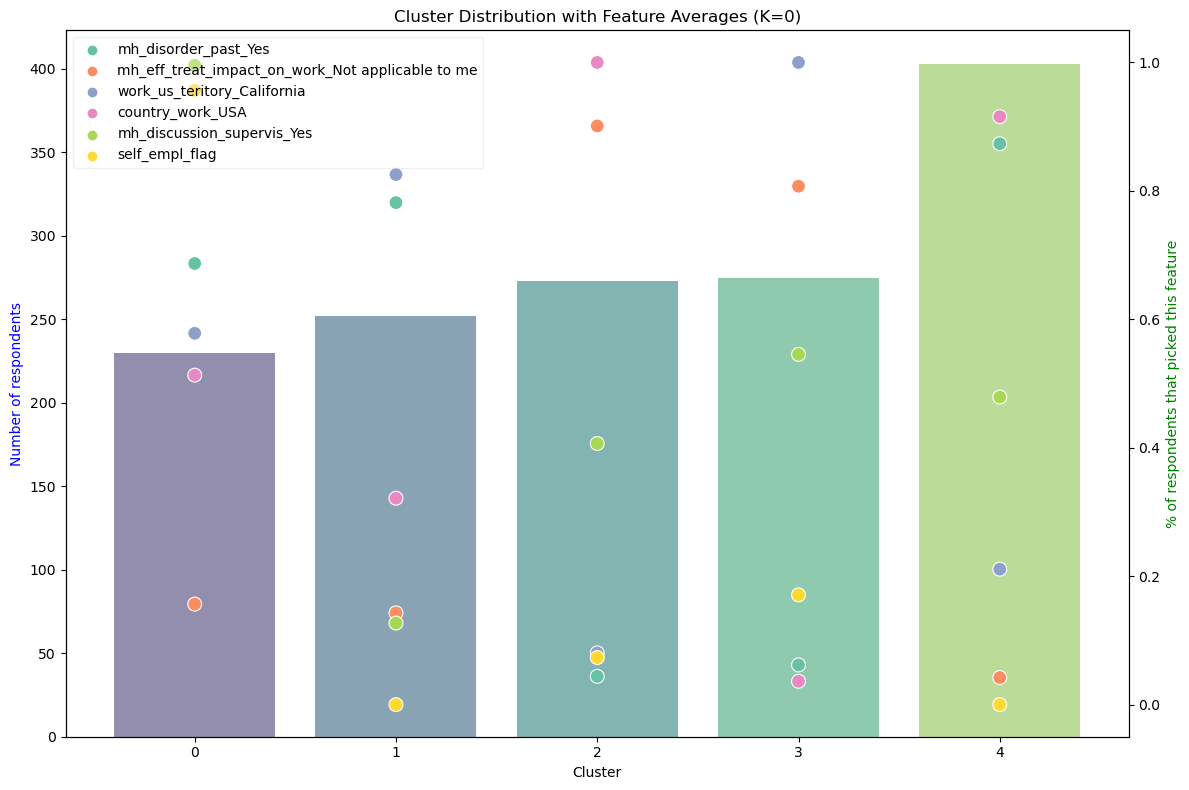

time: 937 ms (started: 2025-08-24 16:27:35 +11:00)


In [217]:
#FOR CLUSTER 0
cluster_counts = dummy['Cluster'].value_counts().sort_index()
feature_means = dummy.groupby('Cluster')[['mh_disorder_past_Yes', 'mh_eff_treat_impact_on_work_Not applicable to me', 'work_us_teritory_California', 'country_work_USA', 'mh_discussion_supervis_Yes', 'self_empl_flag']].mean()
feature_means_reset = feature_means.reset_index().melt( id_vars='Cluster', var_name='Feature', value_name='Average')

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot( x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', alpha=0.6)
ax1.set_ylabel('Number of respondents', color='b')
ax1.set_xlabel('Cluster')
ax1.set_title('Cluster Distribution with Feature Averages (K=0)')

ax2 = ax1.twinx()

#Used a scatterplot instead of lineplot as lineplot would be too cluttered
sns.scatterplot( data=feature_means_reset, x='Cluster', y='Average', hue='Feature', marker='o', ax=ax2, palette='Set2', s=100)
ax2.legend().get_frame().set_alpha(0.3) #for a transparent key
ax2.set_ylabel('% of respondents that picked this feature', color='g')

fig.tight_layout()
plt.show()

<font color = 'yellow'> Cluster 1 <font>

In [218]:
#FOR CLUSTER 1
top1_features_pc = loadings['PC1'].abs().sort_values(ascending=False).head(5)
print("1st---")
print(top1_features_pc)

top2_features_pc = loadings['PC2'].abs().sort_values(ascending=False).head(5)
print("2nd---")
print(top2_features_pc)

top2_features_pc = loadings['PC5'].abs().sort_values(ascending=False).head(5)
print("3rd----")
print(top2_features_pc)

1st---
mh_diagnos_proffesional_Yes                             0.282426
mh_disorder_past_Yes                                    0.274402
mh_sought_proffes_treatm                                0.272608
mh_eff_treat_impact_on_work_Not applicable to me        0.272392
mh_not_eff_treat_impact_on_work_Not applicable to me    0.262361
Name: PC1, dtype: float64
2nd---
live_us_teritory_California    0.253946
country_live_USA               0.252159
work_us_teritory_California    0.251543
country_work_USA               0.249462
mh_resources_provided_No       0.231100
Name: PC2, dtype: float64
3rd----
age                            0.285402
work_us_teritory_California    0.276717
live_us_teritory_California    0.275401
country_work_USA               0.262384
country_live_USA               0.260068
Name: PC5, dtype: float64
time: 78 ms (started: 2025-08-24 16:27:36 +11:00)


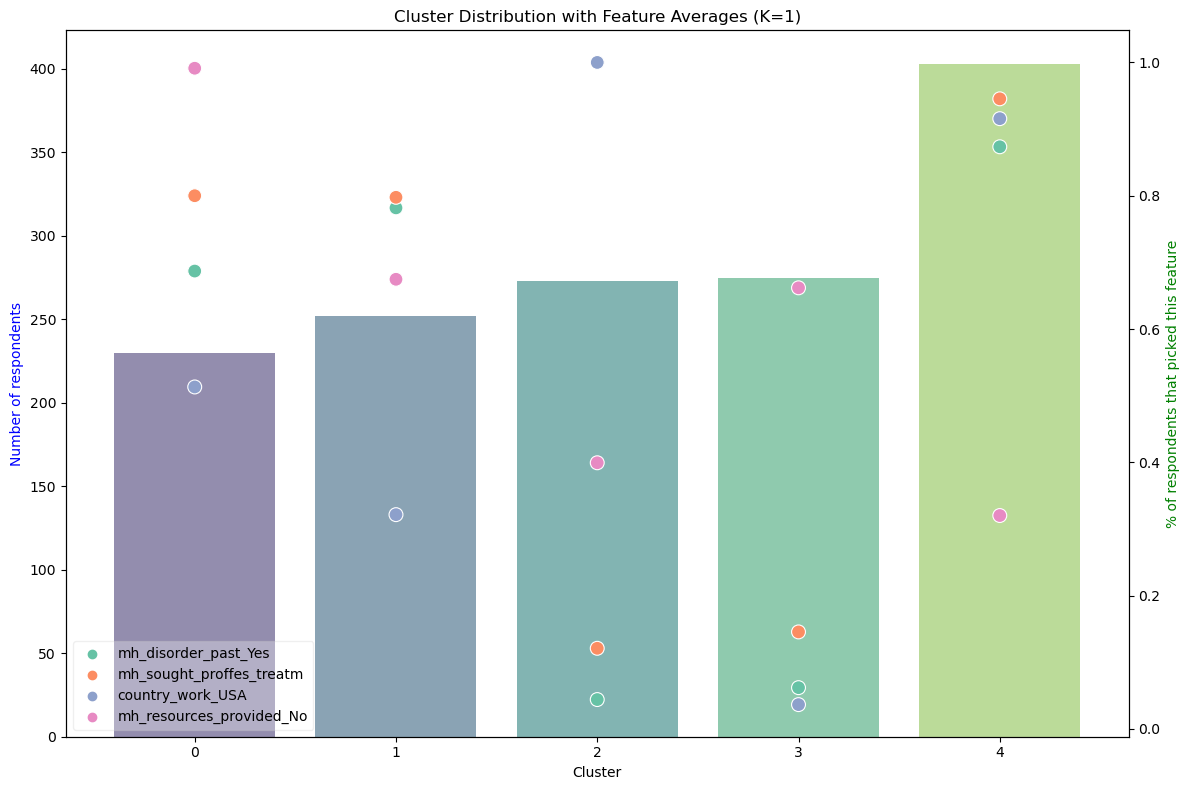

time: 969 ms (started: 2025-08-24 16:27:37 +11:00)


In [219]:
#FOR CLUSTER 1
cluster_counts = dummy['Cluster'].value_counts().sort_index()
feature_means = dummy.groupby('Cluster')[['mh_disorder_past_Yes', 'mh_sought_proffes_treatm', 'country_work_USA', 'mh_resources_provided_No']].mean()
feature_means_reset = feature_means.reset_index().melt( id_vars='Cluster', var_name='Feature', value_name='Average')

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot( x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', alpha=0.6)
ax1.set_ylabel('Number of respondents', color='b')
ax1.set_xlabel('Cluster')
ax1.set_title('Cluster Distribution with Feature Averages (K=1)')

ax2 = ax1.twinx()

#Used a scatterplot instead of lineplot as lineplot would be too cluttered
sns.scatterplot( data=feature_means_reset, x='Cluster', y='Average', hue='Feature', marker='o', ax=ax2, palette='Set2', s=100)
ax2.legend().get_frame().set_alpha(0.3) #for a transparent key
ax2.set_ylabel('% of respondents that picked this feature', color='g')

fig.tight_layout()
plt.show()

<font color = 'yellow'> Cluster 2 <font>

In [220]:
#FOR CLUSTER 2
top1_features_pc = loadings['PC7'].abs().sort_values(ascending=False).head(5)
print("1st---")
print(top1_features_pc)

top2_features_pc = loadings['PC4'].abs().sort_values(ascending=False).head(5)
print("2nd---")
print(top2_features_pc)

top2_features_pc = loadings['PC13'].abs().sort_values(ascending=False).head(5)
print("3rd----")
print(top2_features_pc)

1st---
prev_mh_importance_employer_None did                    0.348652
prev_mh_discussion_None did                             0.336731
prev_mh_importance_employer_Some did                    0.320251
prev_mh_resources_Some did                              0.310074
prev_mh_benefits_awareness_N/A (not currently aware)    0.295627
Name: PC7, dtype: float64
2nd---
age                                           0.622408
mh_hurt_on_career_Yes, I think it would       0.187463
mh_neg_view_cowork_Yes, I think they would    0.184655
mh_discussion_neg_impact_No                   0.163768
mh_discussion_cowork_No                       0.160290
Name: PC4, dtype: float64
3rd----
remote_flag_Sometimes                        0.327335
mh_not_eff_treat_impact_on_work_Sometimes    0.290011
mh_bad_response_workplace_No                 0.259506
mh_not_eff_treat_impact_on_work_Often        0.255196
remote_flag_Never                            0.243237
Name: PC13, dtype: float64
time: 32 ms (started: 2025-08

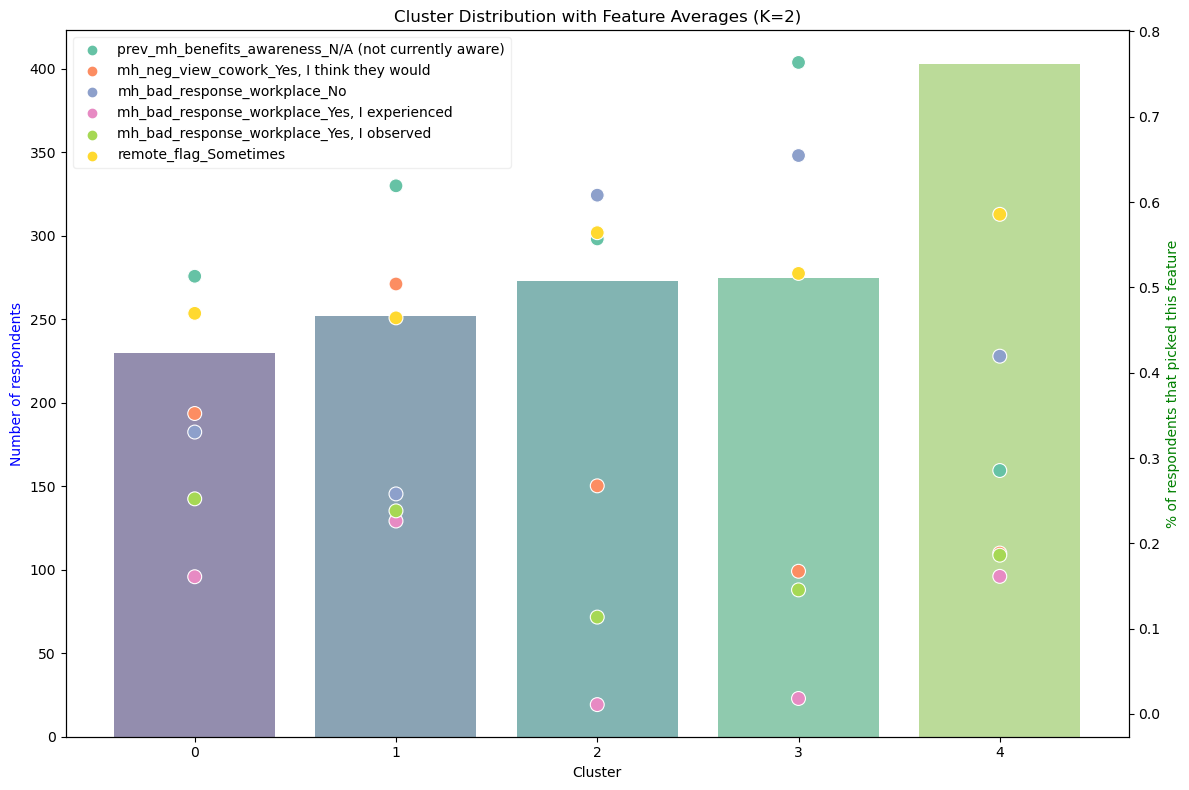

time: 1.2 s (started: 2025-08-24 16:27:38 +11:00)


In [221]:
#FOR CLUSTER 2
cluster_counts = dummy['Cluster'].value_counts().sort_index()
#feature_means = dummy.groupby('Cluster')[['prev_mh_benefits_awareness_N/A (not currently aware)', 'mh_neg_view_cowork_Yes, I think they would', 'mh_bad_response_workplace_No', 'remote_flag_Sometimes']].mean()
feature_means = dummy.groupby('Cluster')[['prev_mh_benefits_awareness_N/A (not currently aware)', 'mh_neg_view_cowork_Yes, I think they would', 'mh_bad_response_workplace_No', 'mh_bad_response_workplace_Yes, I experienced', 'mh_bad_response_workplace_Yes, I observed', 'remote_flag_Sometimes']].mean()
feature_means_reset = feature_means.reset_index().melt( id_vars='Cluster', var_name='Feature', value_name='Average')

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot( x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', alpha=0.6)
ax1.set_ylabel('Number of respondents', color='b')
ax1.set_xlabel('Cluster')
ax1.set_title('Cluster Distribution with Feature Averages (K=2)')

ax2 = ax1.twinx()

#Used a scatterplot instead of lineplot as lineplot would be too cluttered
sns.scatterplot( data=feature_means_reset, x='Cluster', y='Average', hue='Feature', marker='o', ax=ax2, palette='Set2', s=100)
ax2.legend().get_frame().set_alpha(0.3) #for a transparent key
ax2.set_ylabel('% of respondents that picked this feature', color='g')

fig.tight_layout()
plt.show()

<font color = 'yellow'> Cluster 3 <font>

In [222]:
#FOR CLUSTER 3
top1_features_pc = loadings['PC6'].abs().sort_values(ascending=False).head(5)
print("1st---")
print(top1_features_pc)

top2_features_pc = loadings['PC5'].abs().sort_values(ascending=False).head(5)
print("2nd---")
print(top2_features_pc)

top2_features_pc = loadings['PC2'].abs().sort_values(ascending=False).head(5)
print("3rd----")
print(top2_features_pc)

1st---
prev_mh_discussion_supervisor_Some of my previous employers    0.394786
prev_mh_discuss_neg_conseq_Some of them                        0.353186
prev_mh_discussion_cowork_Some of my previous employers        0.320524
prev_mh_benefits_Some did                                      0.320518
prev_ph_discuss_neg_conseq_Some of them                        0.264104
Name: PC6, dtype: float64
2nd---
age                            0.285402
work_us_teritory_California    0.276717
live_us_teritory_California    0.275401
country_work_USA               0.262384
country_live_USA               0.260068
Name: PC5, dtype: float64
3rd----
live_us_teritory_California    0.253946
country_live_USA               0.252159
work_us_teritory_California    0.251543
country_work_USA               0.249462
mh_resources_provided_No       0.231100
Name: PC2, dtype: float64
time: 16 ms (started: 2025-08-24 16:27:39 +11:00)


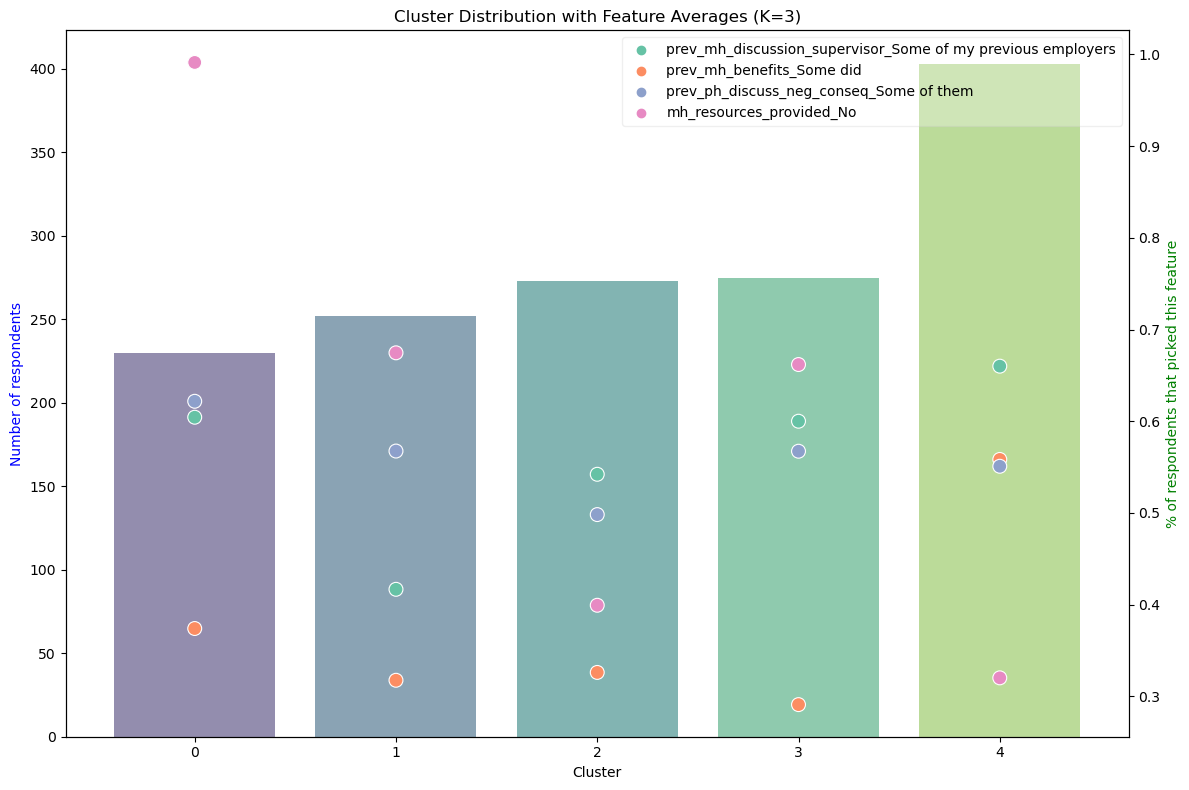

time: 1.03 s (started: 2025-08-24 16:27:39 +11:00)


In [223]:
#FOR CLUSTER 3
cluster_counts = dummy['Cluster'].value_counts().sort_index()
feature_means = dummy.groupby('Cluster')[['prev_mh_discussion_supervisor_Some of my previous employers', 'prev_mh_benefits_Some did', 'prev_ph_discuss_neg_conseq_Some of them', 'mh_resources_provided_No']].mean()
feature_means_reset = feature_means.reset_index().melt( id_vars='Cluster', var_name='Feature', value_name='Average')

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot( x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', alpha=0.6)
ax1.set_ylabel('Number of respondents', color='b')
ax1.set_xlabel('Cluster')
ax1.set_title('Cluster Distribution with Feature Averages (K=3)')

ax2 = ax1.twinx()

#Used a scatterplot instead of lineplot as lineplot would be too cluttered
sns.scatterplot( data=feature_means_reset, x='Cluster', y='Average', hue='Feature', marker='o', ax=ax2, palette='Set2', s=100)
ax2.legend().get_frame().set_alpha(0.3) #for a transparent key
ax2.set_ylabel('% of respondents that picked this feature', color='g')

fig.tight_layout()
plt.show()

<font color = 'yellow'> Cluster 4 <font>

In [224]:
#FOR CLUSTER 4
top1_features_pc = loadings['PC6'].abs().sort_values(ascending=False).head(5)
print("1st---")
print(top1_features_pc)

top2_features_pc = loadings['PC5'].abs().sort_values(ascending=False).head(5)
print("2nd---")
print(top2_features_pc)

top2_features_pc = loadings['PC1'].abs().sort_values(ascending=False).head(5)
print("3rd----")
print(top2_features_pc)

1st---
prev_mh_discussion_supervisor_Some of my previous employers    0.394786
prev_mh_discuss_neg_conseq_Some of them                        0.353186
prev_mh_discussion_cowork_Some of my previous employers        0.320524
prev_mh_benefits_Some did                                      0.320518
prev_ph_discuss_neg_conseq_Some of them                        0.264104
Name: PC6, dtype: float64
2nd---
age                            0.285402
work_us_teritory_California    0.276717
live_us_teritory_California    0.275401
country_work_USA               0.262384
country_live_USA               0.260068
Name: PC5, dtype: float64
3rd----
mh_diagnos_proffesional_Yes                             0.282426
mh_disorder_past_Yes                                    0.274402
mh_sought_proffes_treatm                                0.272608
mh_eff_treat_impact_on_work_Not applicable to me        0.272392
mh_not_eff_treat_impact_on_work_Not applicable to me    0.262361
Name: PC1, dtype: float64
time: 141 ms (s

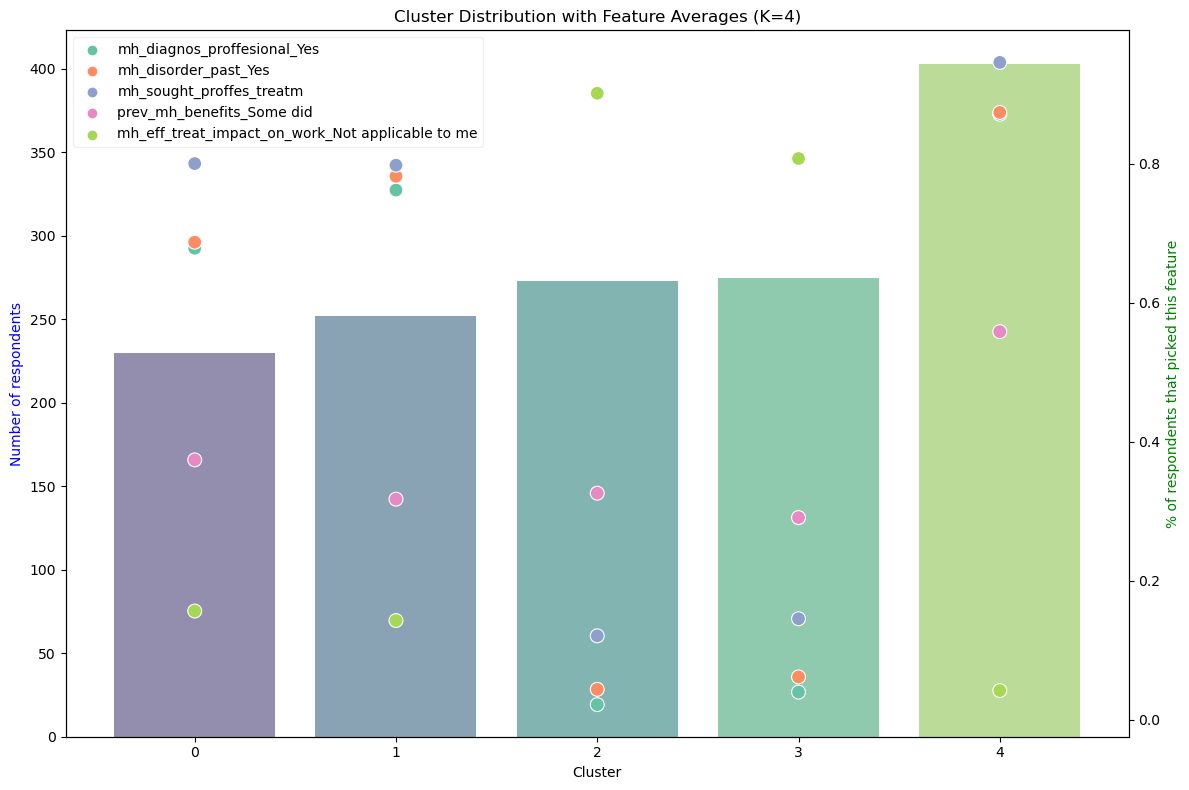

time: 1.45 s (started: 2025-08-24 16:27:41 +11:00)


In [225]:
#FOR CLUSTER 4
cluster_counts = dummy['Cluster'].value_counts().sort_index()
feature_means = dummy.groupby('Cluster')[['mh_diagnos_proffesional_Yes', 'mh_disorder_past_Yes', 'mh_sought_proffes_treatm', 'prev_mh_benefits_Some did', 'mh_eff_treat_impact_on_work_Not applicable to me']].mean()
feature_means_reset = feature_means.reset_index().melt( id_vars='Cluster', var_name='Feature', value_name='Average')

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot( x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', alpha=0.6)
ax1.set_ylabel('Number of respondents', color='b')
ax1.set_xlabel('Cluster')
ax1.set_title('Cluster Distribution with Feature Averages (K=4)')

ax2 = ax1.twinx()

#Used a scatterplot instead of lineplot as lineplot would be too cluttered
sns.scatterplot( data=feature_means_reset, x='Cluster', y='Average', hue='Feature', marker='o', ax=ax2, palette='Set2', s=100)
ax2.legend().get_frame().set_alpha(0.3) #for a transparent key
ax2.set_ylabel('% of respondents that picked this feature', color='g')

fig.tight_layout()
plt.show()